In [0]:
################################################################### QUESTIONS S#######################################W#########################################

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes 
##    have to be a part of the analysis and why (5 points)
## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters 
##    and do cross validation to find the accuracy. (10 points)

#####################################################################################################################################################################

In [0]:

import pandas as Pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import io
import numpy as np
  
## setting plot style 
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.style.use(['ggplot'])

In [0]:
from google.colab import files
uploaded = files.upload()

Saving vehicle.csv to vehicle (1).csv


In [0]:
data_raw = Pd.read_csv(io.BytesIO(uploaded['vehicle.csv']))

In [0]:
print(data_raw.shape)
print(data_raw.info())


(846, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows

In [0]:
data_train = data_raw.copy(deep=True)

In [0]:
data_train.head(3)

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car

[3 rows x 19 columns]

In [0]:
############################ Treating the null values #########################################

In [0]:
data_train.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

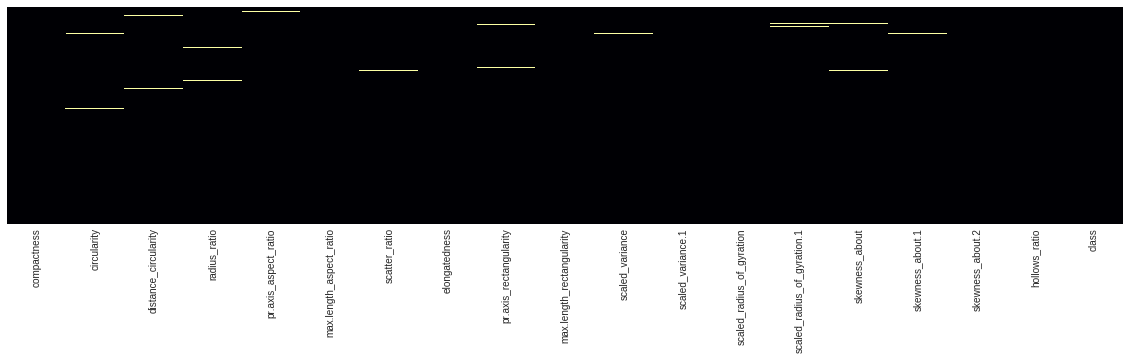

In [0]:
## finding the null and missing values in the database
plt.figure(figsize=(20,4))
plt.style.use(['seaborn-white'])
sns.heatmap(data_train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 


In [0]:
data_train['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [0]:
data_train_imputer = data_train.copy(deep=True)

In [0]:
def Imputer(dataset,method):
  from sklearn.preprocessing import Imputer
  imputer = Imputer(missing_values=np.nan, strategy=method, axis = 1)  ## mean , median , most_frequent
  columns = dataset.select_dtypes(exclude='object').columns
  X= dataset[columns].values
  imputer = imputer.fit(X[:,:])
  X[:,:] = imputer.transform(X[:, :])
  dataset[columns] = X[:,:]  
  

In [0]:
Imputer(data_train_imputer,'mean')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
data_train_imputer.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

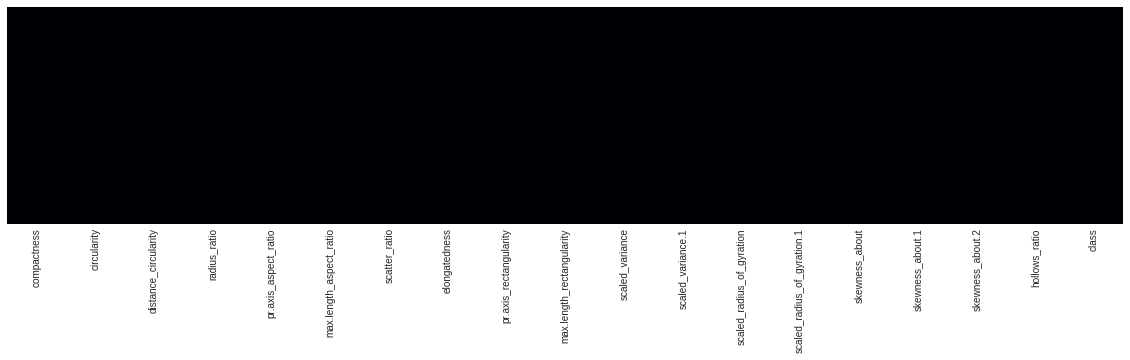

In [0]:
## finding the null and missing values in the database
plt.figure(figsize=(20,4))
plt.style.use(['seaborn-white'])
sns.heatmap(data_train_imputer.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 


In [0]:
data_train_imputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [0]:
########################### HYPOTHESIS TESTING AFTER NULL FIXING ########################################

In [0]:
from scipy.stats import ttest_ind

def two_sample_ttest(dataset_old,dataset_new,pvalue_H0):
  stat=0
  pvalue=0
  dataset_name1 = dataset_old.copy(deep=True)
  dataset_name2 = dataset_new.copy(deep=True)
  
  col1=dataset_name1.select_dtypes(exclude='object').columns
  col2=dataset_name2.select_dtypes(exclude='object').columns
  if len(col1)==len(col2):
    for i in range(len(col1)):
      #print(i)
      if col1[i]==col2[i]:
               
        stat, pvalue = ttest_ind(dataset_name1[col1[i]].fillna(0) , dataset_name2[col2[i]])
        print("Tstatistic :- {0} , Pvalue :- {1} for column {2} ".format(stat,pvalue,col1[i]))
        print("compare means", dataset_name1[col1[i]].mean() , dataset_name2[col2[i]].mean())
        

        if pvalue > pvalue_H0:
              print('Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- {}'.format(col1[i]))
        else:
              print('Failed , Samples are likely drawn from different distributions (reject H0) for the column :- {}'.format(col1[i]))
        print('.........................................................................................................')
              


In [0]:
two_sample_ttest(data_train,data_train_imputer,0.05)

Tstatistic :- 0.0 , Pvalue :- 1.0 for column compactness 
compare means 93.67848699763593 93.67848699763593
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- compactness
.........................................................................................................
Tstatistic :- -2.007680432416985 , Pvalue :- 0.04483618069268673 for column circularity 
compare means 44.828775267538646 45.40194832661197
Failed , Samples are likely drawn from different distributions (reject H0) for the column :- circularity
.........................................................................................................
Tstatistic :- -0.7050181852830933 , Pvalue :- 0.48089607037014415 for column distance_circularity 
compare means 82.1104513064133 82.2828839869281
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- distance_circularity
.......................................................

In [0]:
############################################### CHECKING THE CLASS IMBALANCE ###############################################

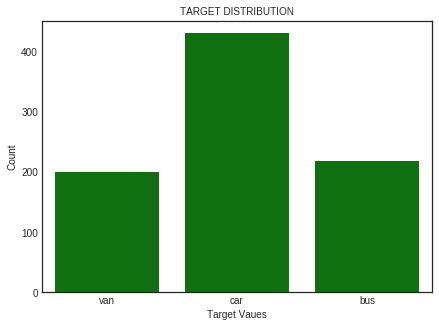

In [0]:
plt.subplots(1,1,figsize=(7,5)) 
plt.style.use(['dark_background'])
g = sns.countplot(x=data_train_imputer['class'], data=data_train_imputer, color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 10)
g.set_xlabel("Target Vaues", fontsize = 10)
g.set_ylabel("Count", fontsize = 10)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data_train_imputer)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()


In [0]:
########################## Checking the distribution of each attributes through Boxplot and Distribution graph  ###########################################

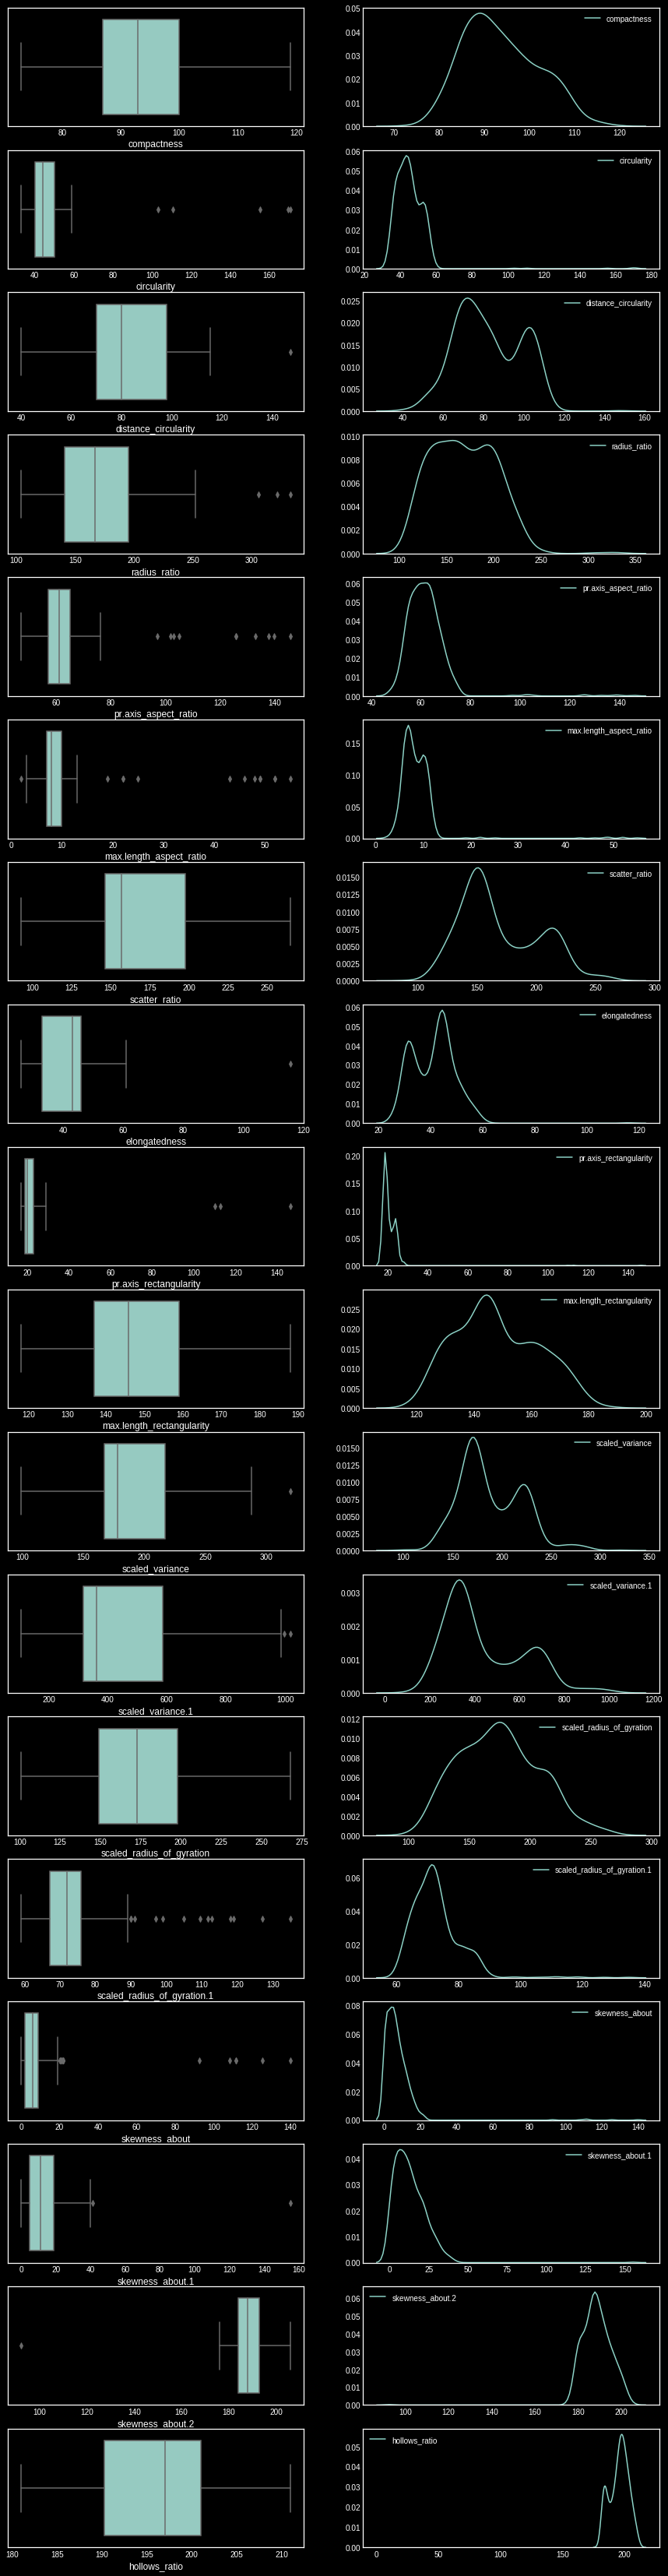

In [0]:
plt.style.use(['dark_background'])



## setting plot style 
#plt.style.use('fivethirtyeight') 

col_d = data_train_imputer.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train_imputer.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,60))

i=0
j=0
k=0

for i in range (len(col_d)):
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  ax1= sns.boxplot(x=data_train_imputer[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train_imputer[col_d[i]],ax = qaxis[j,k]) 
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0   
   

In [0]:
################# Checking in the pairplot  ##############################################

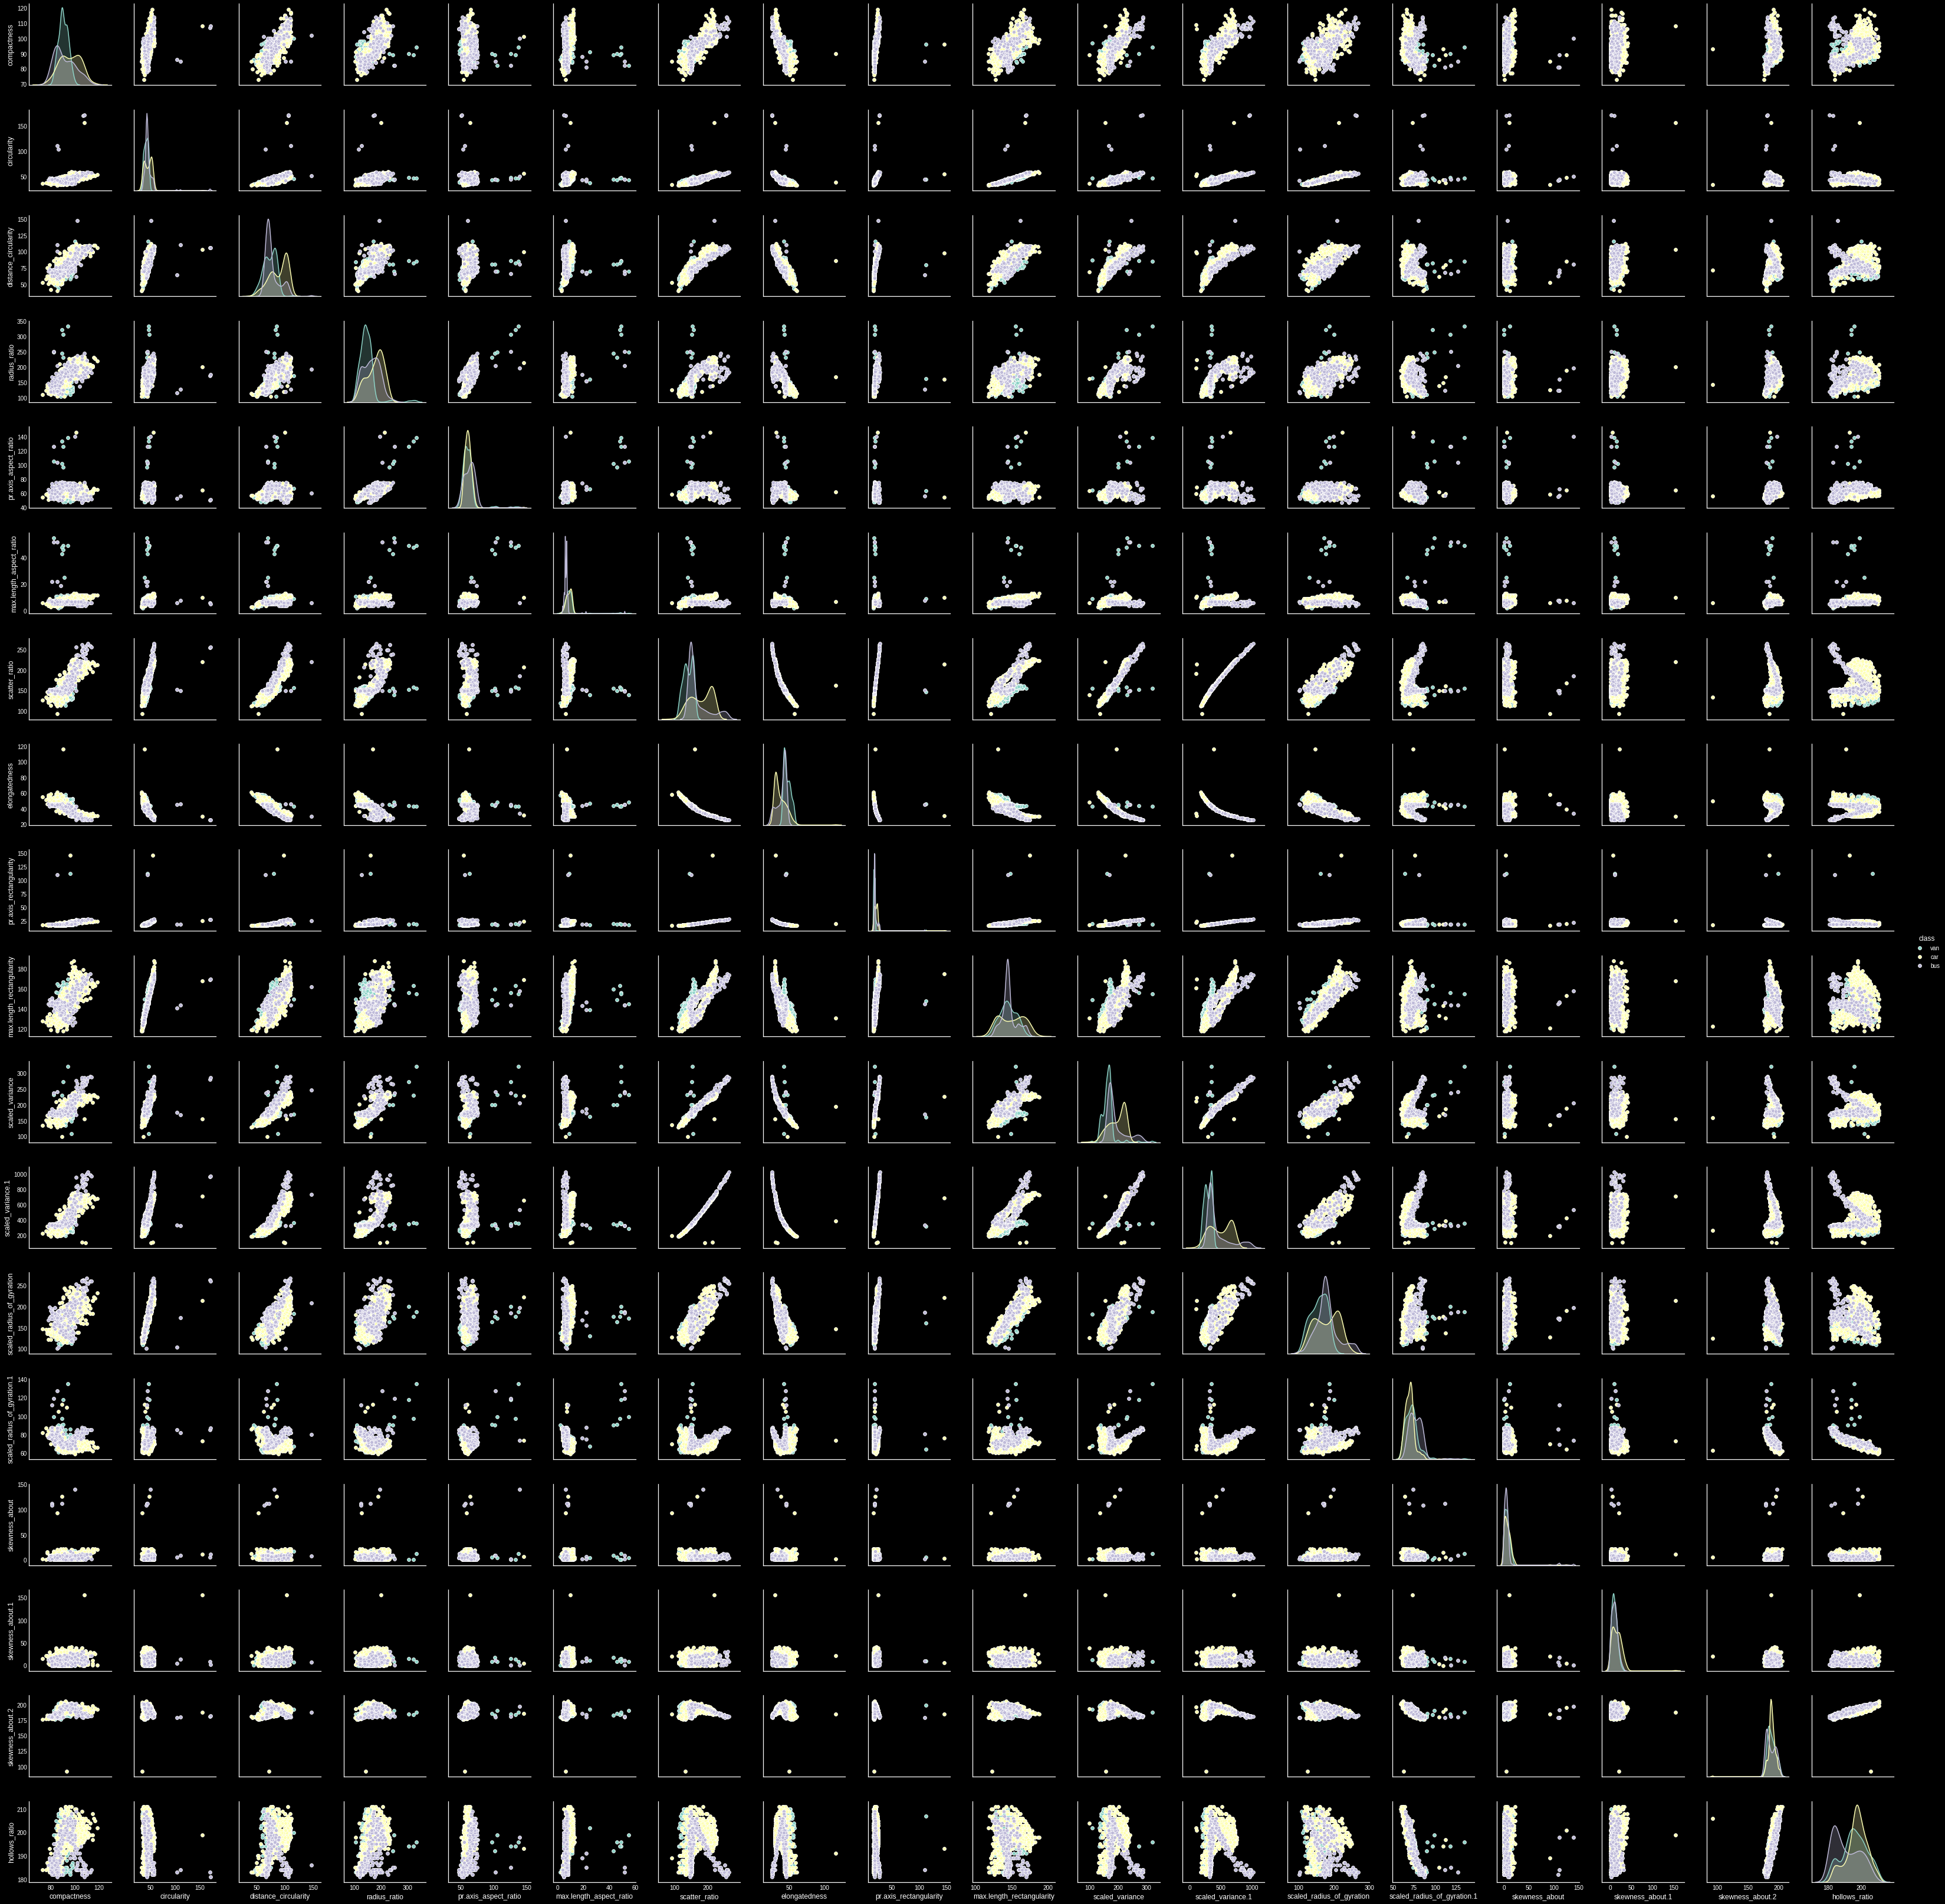

In [0]:
plt.style.use('dark_background')

sns.pairplot(data_train_imputer,diag_kind='kde',hue='class')

In [0]:
####################  As we can see from pairplot , that there is a lot of correlations among different attributes, so will drop the highly correlated columns 

In [0]:
data_train_nw_out = data_train_imputer.copy(deep=True)

In [0]:
################################ OUTLIERS DETECTION #################################
out_compare = Pd.DataFrame(columns=['Column_name'])

col=data_train_nw_out.select_dtypes(exclude='object').columns

for i in range(len(col)):
  
  factor=2.5 
  upper_lmt=data_train_nw_out[col[i]].mean()+data_train_nw_out[col[i]].std()*factor
  lower_lmt=data_train_nw_out[col[i]].mean()-data_train_nw_out[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]>upper_lmt)==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]<lower_lmt)==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

upper_lmt  ...  lower_outlier(%)
Column_name                              ...                  
scaled_variance              267.505843  ...           0.24  %
scaled_variance.1            881.670296  ...           0.00  %
max.length_aspect_ratio       20.070418  ...           0.00  %
pr.axis_aspect_ratio          83.912027  ...           0.00  %
scaled_radius_of_gyration.1   92.363293  ...           0.00  %
scatter_ratio                252.057454  ...           0.00  %
scaled_radius_of_gyration    256.382212  ...           0.00  %
compactness                  114.264673  ...           0.12  %
skewness_about                33.214715  ...           0.00  %
circularity                   70.148905  ...           0.00  %
skewness_about.1              38.235161  ...           0.00  %
radius_ratio                 252.641657  ...           0.00  %
pr.axis_rectangularity        37.684832  ...           0.00  %
max.length_rectangularity    184.287947  ...           0.00  %
distance_circularity         122.242352  ...           0.24  %
elongatedness                 61.582984  ...           0.00  %
skewness_about.2             206.284793  ...           0.12  %
hollows_ratio                214.229381  ...           0.00  %

[18 rows x 4 columns]

In [0]:
#################### OUTLIERS TREATMENT and Verifying it after the treatment  ##############################################

col=data_train_nw_out.select_dtypes(exclude='object').columns
out_fx_compare = Pd.DataFrame(columns=['Column_name'])

for i in range(len(col)):
  #repl_value = out_compare.loc[col[i],'upper_lmt']
  repl_value = data_train_nw_out[col[i]].mean()
  #print('column {}:- has mean value {}'.format(col[i],repl_value))
  data_train_nw_out[col[i]].replace(data_train_nw_out[(data_train_nw_out[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement upper limit
  data_train_nw_out[col[i]].replace(data_train_nw_out[(data_train_nw_out[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]],repl_value,inplace=True) ## value replacement lower limit
  
  out_fx_compare.loc[i,'Column_name']=col[i]
  out_fx_compare.loc[i,'upper_lmt_old']=out_compare.loc[col[i],'upper_lmt']
  out_fx_compare.loc[i,'lower_lmt_old']=out_compare.loc[col[i],'lower_lmt']
  out_fx_compare.loc[i,'upper_outlier_nw(%)']='{0:=5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
  out_fx_compare.loc[i,'lower_outlier_nw(%)']='{0:<5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
 
out_fx_compare = out_fx_compare.sort_values(by=['upper_lmt_old'],ascending=False)
out_fx_compare.set_index('Column_name',inplace=True)
out_fx_compare


upper_lmt_old  ...  lower_outlier_nw(%)
Column_name                                 ...                     
scaled_variance.1               881.670296  ...              0.00  %
scaled_variance                 267.505843  ...              0.00  %
scaled_radius_of_gyration       256.382212  ...              0.00  %
radius_ratio                    252.641657  ...              0.00  %
scatter_ratio                   252.057454  ...              0.00  %
hollows_ratio                   214.229381  ...              0.00  %
skewness_about.2                206.284793  ...              0.00  %
max.length_rectangularity       184.287947  ...              0.00  %
distance_circularity            122.242352  ...              0.00  %
compactness                     114.264673  ...              0.00  %
scaled_radius_of_gyration.1      92.363293  ...              0.00  %
pr.axis_aspect_ratio             83.912027  ...              0.00  %
circularity                      70.148905  ...              0.00  %
elongatedness                    61.582984  ...              0.00  %
skewness_about.1                 38.235161  ...              0.00  %
pr.axis_rectangularity           37.684832  ...              0.00  %
skewness_about                   33.214715  ...              0.00  %
max.length_aspect_ratio          20.070418  ...              0.00  %

[18 rows x 4 columns]

In [0]:
#################################### COMPARING BEFORE AND AFTER OUTLIER FIXING #########################################

In [0]:
data_train_nw = data_train_imputer.copy(deep=True)

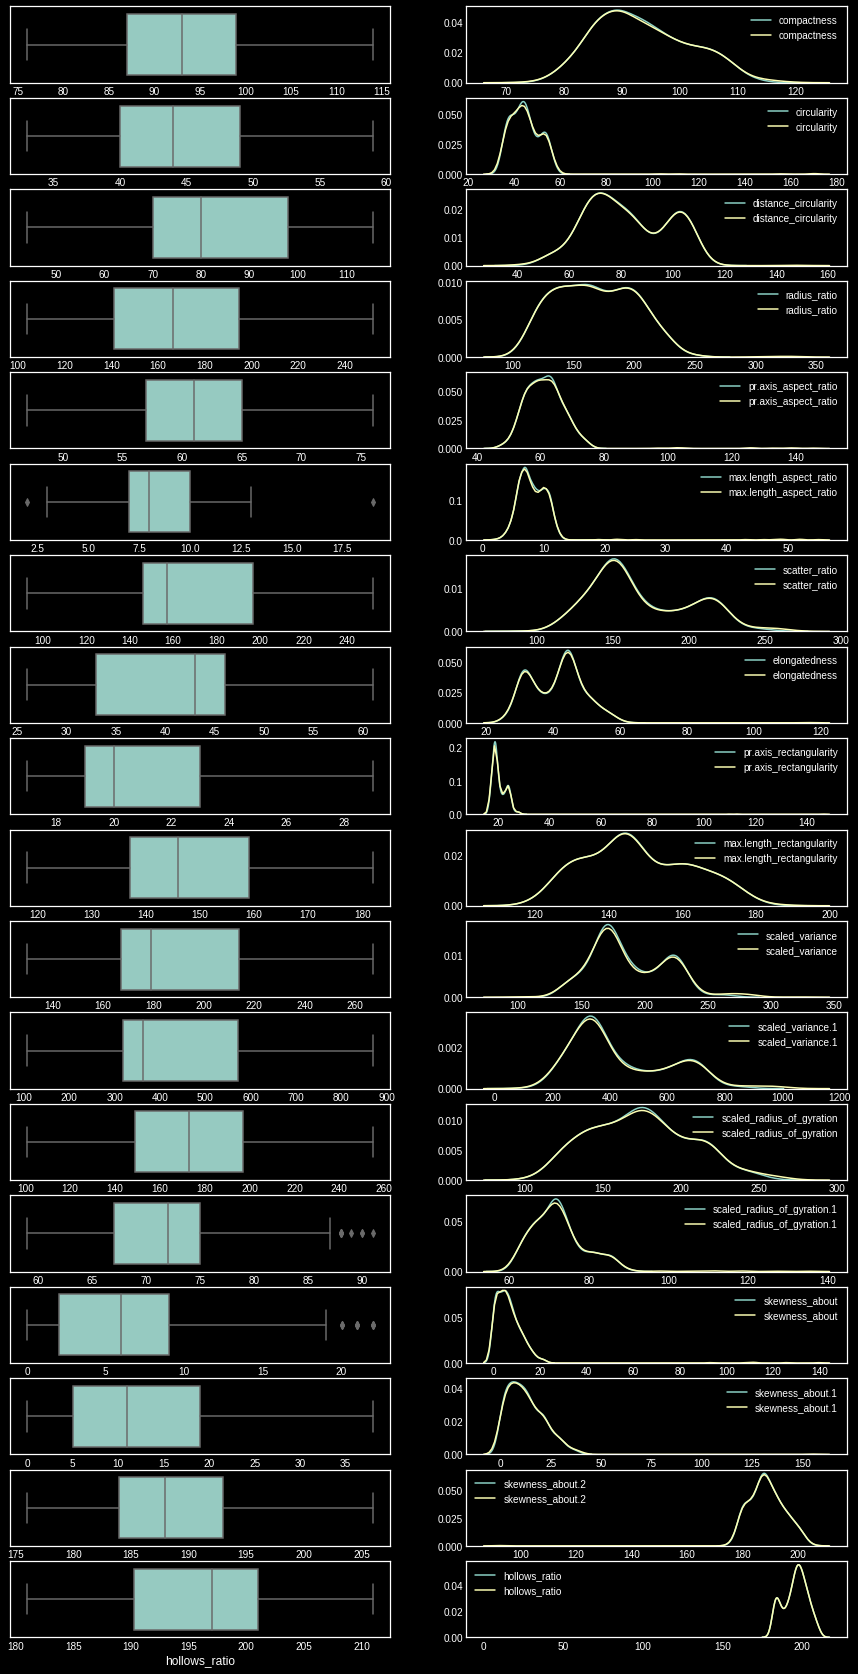

In [0]:
col_d = data_train_nw_out.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train_nw_out.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,30))

i=0
j=0
k=0

for i in range (len(col_d)):
  
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  
  ax1= sns.boxplot(x=data_train_nw_out[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train_nw_out[col_d[i]],ax = qaxis[j,k])       ## dataset after outlier treatment
  ax2=sns.kdeplot(data_train_imputer[col_d[i]],ax = qaxis[j,k])  ## dataset before outlier treatment
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0   
   

In [0]:
########################### HYPOTHESIS TESTING AFTER OUTLIERS FIXING ########################################

In [0]:
from scipy.stats import ttest_ind


def two_sample_ttest(dataset_old,dataset_new,pvalue_H0):
  stat=0
  pvalue=0
  dataset_name1 = dataset_old.copy(deep=True)
  dataset_name2 = dataset_new.copy(deep=True)
  
  col1=dataset_name1.select_dtypes(exclude='object').columns
  col2=dataset_name2.select_dtypes(exclude='object').columns
  if len(col1)==len(col2):
    for i in range(len(col1)):
      #print(i)
      if col1[i]==col2[i]:
               
        stat, pvalue = ttest_ind(dataset_name1[col1[i]].fillna(0) , dataset_name2[col2[i]])
        print("Tstatistic :- {0} , Pvalue :- {1} for column {2} ".format(stat,pvalue,col1[i]))
        print("compare means", dataset_name1[col1[i]].mean() , dataset_name2[col2[i]].mean())
        

        if pvalue > pvalue_H0:
              print('Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- {}'.format(col1[i]))
        else:
              print('Failed , Samples are likely drawn from different distributions (reject H0) for the column :- {}'.format(col1[i]))
        print('.........................................................................................................')
              


In [0]:
two_sample_ttest(data_raw,data_train_nw_out,0.05)

Tstatistic :- 0.3425617603668371 , Pvalue :- 0.731970773425148 for column compactness 
compare means 93.67848699763593 93.54343901771094
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- compactness
.........................................................................................................
Tstatistic :- -0.8364048481065844 , Pvalue :- 0.4030454312661427 for column circularity 
compare means 44.828775267538646 44.83216281516909
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- circularity
.........................................................................................................
Tstatistic :- -0.7372838258420248 , Pvalue :- 0.4610521118260562 for column distance_circularity 
compare means 82.1104513064133 82.30356449612941
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- distance_circularity
...................

In [0]:
#################### 3- Correlation Matrix with Heatmap ####################################
plt.style.use('ggplot') 

#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.8 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

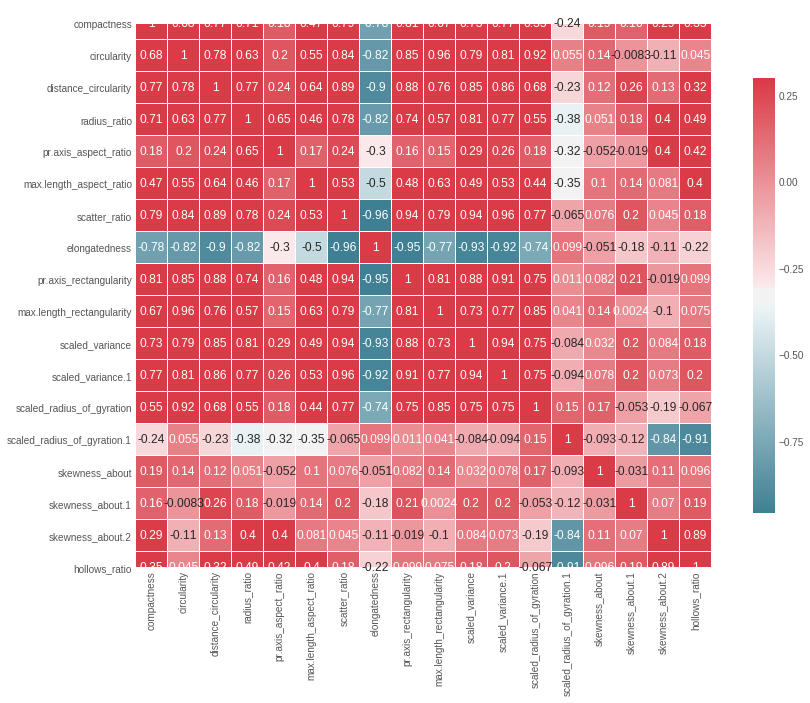

In [0]:
correlation_heatmap(data_train_nw_out)

In [0]:
data_train_nw_out.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [0]:
##################################################### LABEL ENCODING #####################################################################################
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data_train_nw_out['class_cd']= label_encoder.fit_transform(data_train_nw_out['class']) 
  
data_train_nw_out['class_cd'].unique() 

array([2, 1, 0])

In [0]:
#################### 1- SelectKBest , 2- Feature Importance   ####################################

#apply SelectKBest class to extract top 10 best features score_func=chi2
from sklearn.feature_selection import chi2,f_classif,f_regression,f_oneway,SelectKBest
from  sklearn.ensemble import ExtraTreesClassifier

columns = data_train_nw_out.columns
y1= data_train_nw_out['class_cd'].values
X1=data_train_nw_out.drop(columns=['class','class_cd']).values

feature_compare_tbl = Pd.DataFrame({'Attributes':columns})
no_of_selected_features = 12

score_f = [chi2,f_classif,f_regression,f_oneway,ExtraTreesClassifier]
i=0
for i in range(len(score_f)):
  if score_f[i].__name__== 'ExtraTreesClassifier':
    model = ExtraTreesClassifier(criterion='entropy')
    model.fit(X1,y1)
    scores = Pd.DataFrame(model.feature_importances_)
    feature_compare_tbl = Pd.concat([feature_compare_tbl,scores],axis=1)
    feature_compare_tbl.rename(columns={0:'Feature_importance'}, inplace=True)
  else:
    bestfeatures = SelectKBest(score_func=score_f[i], k=no_of_selected_features)
    fit = bestfeatures.fit(X1,y1)
    scores = Pd.DataFrame(fit.scores_)  
    feature_compare_tbl = Pd.concat([feature_compare_tbl,scores],axis=1)
    feature_compare_tbl.rename(columns={0:score_f[i].__name__ }, inplace=True)
      
feature_compare_tbl.sort_values(by=['f_regression','chi2','f_classif','f_oneway','Feature_importance'],ascending=False,inplace=True)


feature_compare_tbl.set_index('Attributes')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


chi2  ...  Feature_importance
Attributes                                 ...                    
elongatedness                  326.333189  ...            0.098684
max.length_aspect_ratio         99.653469  ...            0.083695
scaled_variance                879.551161  ...            0.057831
scaled_radius_of_gyration.1     89.240829  ...            0.055387
pr.axis_rectangularity          56.414919  ...            0.051281
scatter_ratio                 1255.700656  ...            0.094640
hollows_ratio                   29.277924  ...            0.055987
scaled_variance.1            12895.982274  ...            0.061912
scaled_radius_of_gyration      409.907551  ...            0.027652
radius_ratio                  1030.634258  ...            0.043395
pr.axis_aspect_ratio            19.167020  ...            0.060976
circularity                     47.788623  ...            0.040197
skewness_about                 119.007693  ...            0.018793
skewness_about.2                 2.111015  ...            0.035258
distance_circularity           500.710344  ...            0.075186
compactness                     53.631952  ...            0.037796
max.length_rectangularity       22.411980  ...            0.072890
skewness_about.1               426.271859  ...            0.028442
class                                 NaN  ...                 NaN
class_cd                              NaN  ...                 NaN

[20 rows x 5 columns]

In [0]:
## taking  the high feature importance

## data_train_nw_out_KBest = data_train_nw_out[['elongatedness','max.length_aspect_ratio','scaled_variance','scaled_radius_of_gyration.1','pr.axis_rectangularity','scatter_ratio',
##                                             'hollows_ratio','scaled_variance.1','scaled_radius_of_gyration','radius_ratio','pr.axis_aspect_ratio','pr.axis_aspect_ratio']]

In [0]:
# data_train_nw_out_KBest.head()

In [0]:
data_train_nw_out['class'].unique() 

array(['van', 'car', 'bus'], dtype=object)

In [0]:
data_train_nw_out.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'class_cd'],
      dtype='object')

In [0]:
data_train_nw_out_Independent_cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

data_train_nw_out_Dependent_cols = ['class_cd']

In [0]:
############################### FEATURE SCALING  ###########################

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = MinMaxScaler()

data_train_z = scaler.fit_transform(data_train_nw_out[data_train_nw_out_Independent_cols])

data_train_z = Pd.DataFrame(data_train_z,columns=data_train_nw_out_Independent_cols)

# data_train_z = data_train.apply(zscore)

In [0]:
data_train_z.head()

compactness  circularity  ...  skewness_about.2  hollows_ratio
0     0.500000     0.576923  ...          0.366667       0.533333
1     0.394737     0.307692  ...          0.433333       0.600000
2     0.736842     0.653846  ...          0.400000       0.500000
3     0.447368     0.307692  ...          0.766667       0.866667
4     0.236842     0.423077  ...          0.133333       0.066667

[5 rows x 18 columns]

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
silhouette_scr =[]
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(data_train_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  silhouette_avg = silhouette_score(data_train_z, labels)
  silhouette_scr.append(silhouette_avg)
  
clusters_df = Pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "silhouette_avg": silhouette_scr} )
clusters_df

num_clusters  cluster_errors  silhouette_avg
0             2      396.927623        0.374965
1             3      311.982650        0.289542
2             4      282.841918        0.236683
3             5      258.948013        0.199978

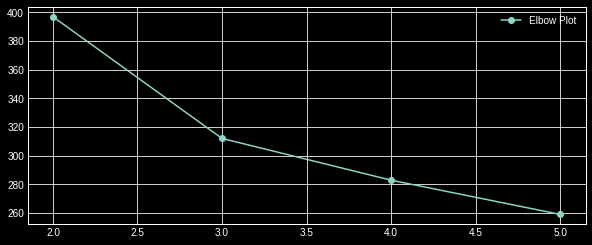

In [0]:
# Elbow plot for the cluster_errors
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.figure(figsize=(10,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,label='Elbow Plot')
plt.legend()

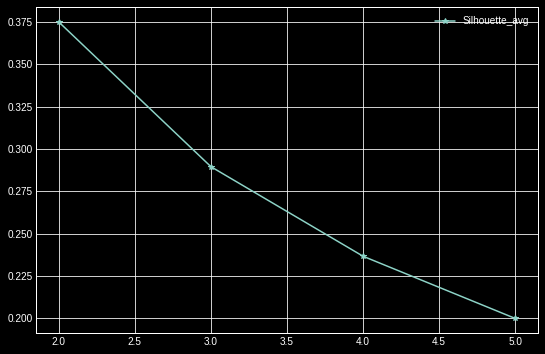

In [0]:
# Elbow plotfor the silhouette_avg
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.figure(figsize=(9,6))
plt.plot( clusters_df.num_clusters, clusters_df.silhouette_avg, marker = "*" ,label='Silhouette_avg')
plt.legend()

For n_clusters = 2 The average silhouette_score is : 0.4897102346747765


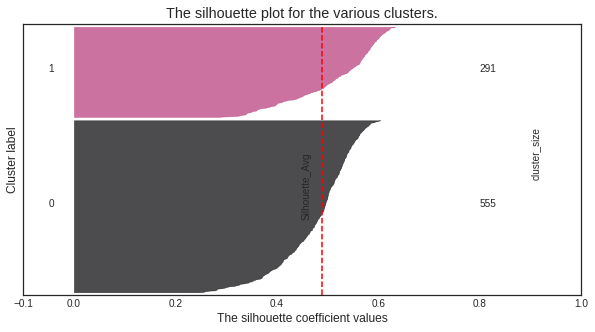

For n_clusters = 3 The average silhouette_score is : 0.5378780122943011


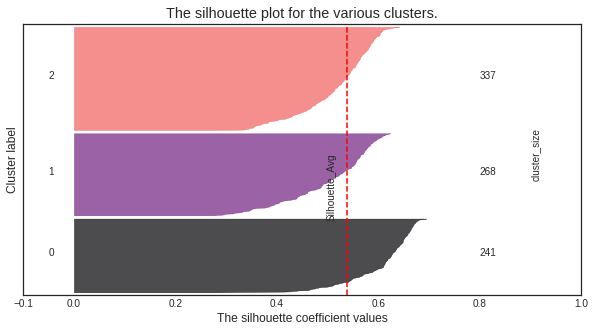

For n_clusters = 4 The average silhouette_score is : 0.5241307115272273


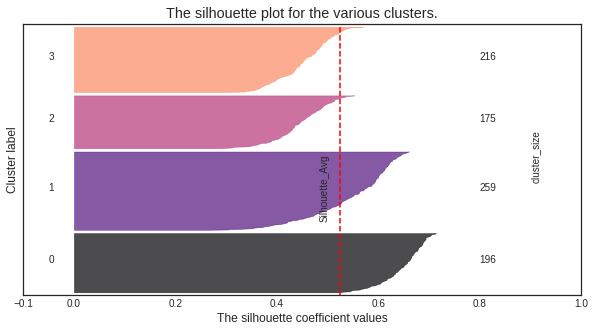

For n_clusters = 5 The average silhouette_score is : 0.516047184302872


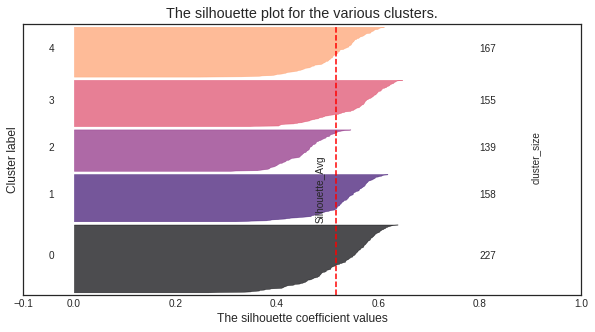

In [0]:
range_n_clusters = range( 2, 6)
plt.style.use('seaborn-white')

for n_clusters in range_n_clusters:
  
    data_train_z_nw = data_train_z.copy(deep = True) 
    
   
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10,5)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_train_z_nw) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_train_z_nw)
    
    clusterer.fit(data_train_z_nw)

    prediction=clusterer.predict(data_train_z_nw)  ## predicting the derived cluster value to each datapoint
    data_train_z_nw["Labels_KM"] = prediction # Creating a new column "Labels_KM" which will hold the cluster id of each record
    cnt_df = data_train_z_nw.groupby("Labels_KM").count()
    col_nm = data_train_z_nw.columns[0]
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_train_z_nw, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_train_z_nw, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.get_cmap('magma')(float(i) / n_clusters) ## Spectral, inferno , plasma , viridis , magma , cividis 
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
        
        

        
        cluster_size = str(cnt_df.loc[i,col_nm])
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Label the silhouette plots with their cluster size at the middle
        
        ax1.text(0.8, y_lower + 0.5 * size_cluster_i, cluster_size)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples 
        
    ax1.text(0.9,380, "cluster_size",rotation=90) 
    ax1.text(silhouette_avg-0.04,250, "Silhouette_Avg",rotation=90)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    plt.show()
    

In [0]:
# The Silhoutte graph  confirms our visual analysis that there are likely 3 good clusters - Balanced
# Let us start with 3 clusters

In [0]:
data_train_z_nw = data_train_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [0]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(data_train_z_nw)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [0]:
data_train_z_nw.shape

(846, 18)

In [0]:
centroids = cluster.cluster_centers_
centroids.shape

(3, 18)

In [0]:
centroid_df = Pd.DataFrame(centroids, columns = list(data_train_z_nw) )
centroid_df

compactness  circularity  ...  skewness_about.2  hollows_ratio
0     0.262574     0.325289  ...          0.210556       0.205417
1     0.413010     0.326638  ...          0.585935       0.654599
2     0.700261     0.731800  ...          0.432466       0.530607

[3 rows x 18 columns]

In [0]:
prediction=cluster.predict(data_train_z)  ## predicting the derived cluster value to each datapoint

prediction

array([1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0,
       1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0,
       1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1,
       1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0,
       0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2,

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(prediction,np.array(data_train_nw_out['class_cd']))

array([[ 85,  75,  80],
       [ 83, 135, 119],
       [ 50, 219,   0]])

In [0]:
data_train_nw_out["Labels_KM_3"] = prediction # Creating a new column "Labels_KM" which will hold the cluster id of each record

In [0]:
data_train_nw_out.groupby("Labels_KM_3").count()

compactness  circularity  ...  class  class_cd
Labels_KM_3                            ...                 
0                    240          240  ...    240       240
1                    337          337  ...    337       337
2                    269          269  ...    269       269

[3 rows x 20 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f117dd65f60>,
      dtype=object)

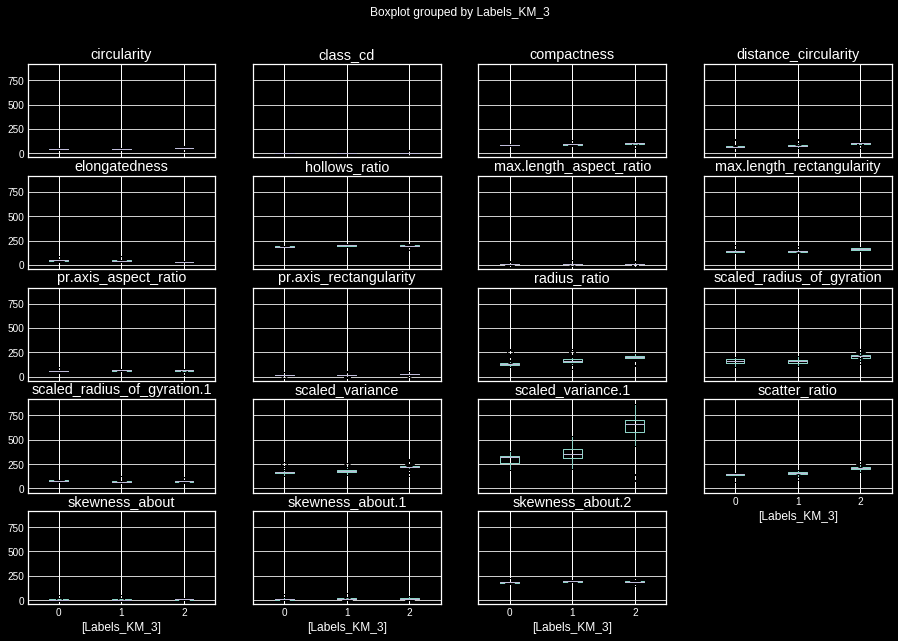

In [0]:
import matplotlib.pylab as plt
plt.style.use(['dark_background'])

data_train_nw_out.boxplot(by = 'Labels_KM_3', figsize=(15, 10))

**AgglomerativeClustering - Cluster Number = 4**

In [0]:
##  More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',  linkage='average') 

## ## centroid distance, “ward” [minimum variance method], “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [0]:
print(data_train_z.columns)
print(data_train_nw_out.columns)

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')
Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'class_cd',
       'Labels_KM_3'],
      dtype='object')


In [0]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
data_train_nw_out['Labels_avAG_3'] = model.labels_

In [0]:
data_train_nw_out.groupby(["Labels_avAG_3"]).count()

compactness  circularity  ...  class_cd  Labels_KM_3
Labels_avAG_3                            ...                       
0                      297          297  ...       297          297
1                      548          548  ...       548          548
2                        1            1  ...         1            1

[3 rows x 21 columns]

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [0]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [0]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'average')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.7101089046167527

In [0]:
Z.shape


(845, 4)

In [0]:
## The y-axis contains the samples and x-axis represents the distance between these samples. The horizontal line with maximum distance is the blue 
## line and hence we can decide a threshold of 6 and cut the dendrogram:

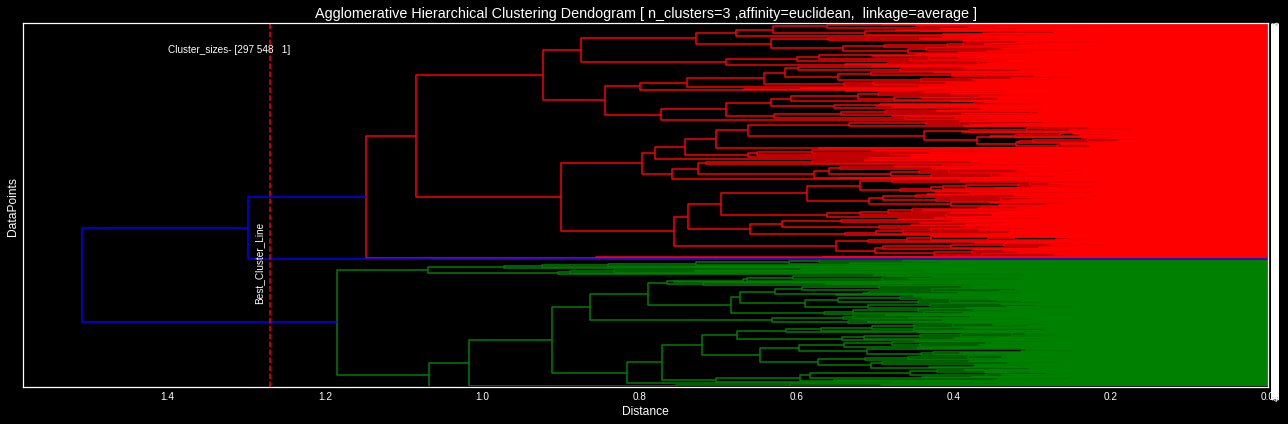

In [0]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=3 ,affinity=euclidean,  linkage=average ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')
# The vertical line for average silhouette score of all the values



best_line = 1.27

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )

plt.axvline(x=best_line, color='r', linestyle='--')
## setting plot style 
plt.style.use(['dark_background'])
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  
plt.text(best_line+0.02,2000,"Best_Cluster_Line",rotation=90)
plt.text(1.4,7800,"Cluster_sizes- {}".format(np.array(data_train_nw_out.groupby(["Labels_avAG_3"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',  linkage='complete') ## “ward”, “complete”, “average”, “single”

In [0]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
data_train_nw_out['Labels_cmAG_3'] = model.labels_

In [0]:
data_train_nw_out.groupby(["Labels_cmAG_3"]).count()

compactness  circularity  ...  Labels_KM_3  Labels_avAG_3
Labels_cmAG_3                            ...                            
0                      244          244  ...          244            244
1                      454          454  ...          454            454
2                      148          148  ...          148            148

[3 rows x 22 columns]

In [0]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'complete')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.6878505938656047

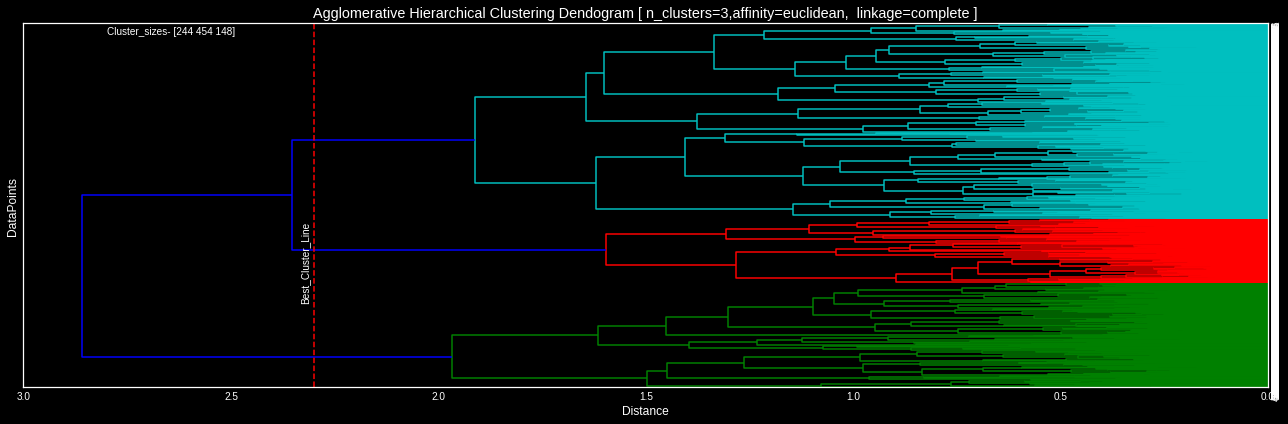

In [0]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=3,affinity=euclidean,  linkage=complete ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line =2.30

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )
plt.axvline(x=best_line, color='r', linestyle='--')
plt.text(best_line+0.034,2000,"Best_Cluster_Line",rotation=90)
plt.text(2.8,8200,"Cluster_sizes- {}".format(np.array(data_train_nw_out.groupby(["Labels_cmAG_3"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean',  linkage='ward') 

## centroid distance, “ward”, “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [0]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
data_train_nw_out['Labels_wdAG_3'] = model.labels_

In [0]:
data_train_nw_out.groupby(["Labels_wdAG_3"]).count()

compactness  circularity  ...  Labels_avAG_3  Labels_cmAG_3
Labels_wdAG_3                            ...                              
0                      283          283  ...            283            283
1                      260          260  ...            260            260
2                      303          303  ...            303            303

[3 rows x 23 columns]

In [0]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'ward')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.7019403888308094

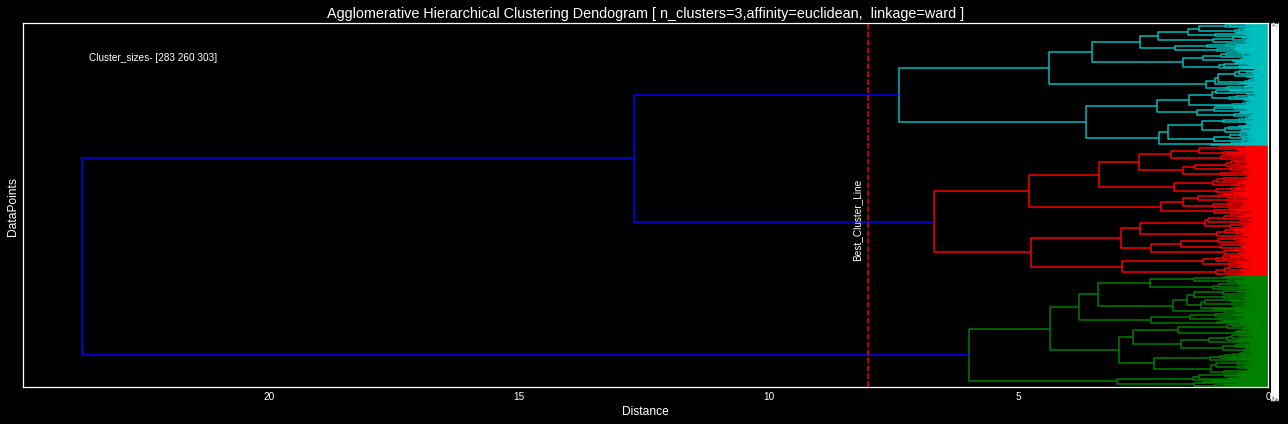

In [0]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=3,affinity=euclidean,  linkage=ward ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line =8.0
ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )


plt.axvline(x=best_line, color='r', linestyle='--')
plt.text(best_line+0.33,3000,"Best_Cluster_Line",rotation=90)
plt.text(23.6,7600,"Cluster_sizes- {}".format(np.array(data_train_nw_out.groupby(["Labels_wdAG_3"]).count())[:,1]),rotation=0)
plt.tight_layout()

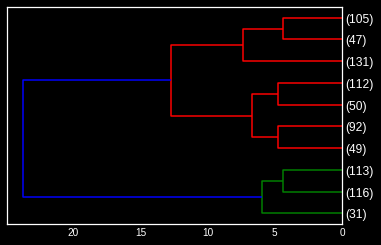

In [0]:
dendrogram(Z, truncate_mode='lastp',  p=10 , orientation ='left')
plt.style.use('seaborn-white')
# show only the last p merged clusters || 'mtica' is an alias for 'level' that’s kept for backward compatibility.
     # show only the last p merged clusters

plt.show()

In [0]:
############################################################################################################################################################################################
############################################################################################################################################################################################

In [0]:
data_train_nw_out.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'class_cd', 'Labels_KM_3',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3'],
      dtype='object')

In [0]:
## We have 4 balanced clusters in the datasets so will apply four models on the basis of KMeans clustering

In [0]:
data_df_clstr0 = data_train_nw_out[data_train_nw_out['Labels_KM_3']==0]
data_df_clstr0.shape

(240, 24)

In [0]:
data_df_clstr1 = data_train_nw_out[data_train_nw_out['Labels_KM_3']==1]
data_df_clstr1.shape

(337, 24)

In [0]:
data_df_clstr2 = data_train_nw_out[data_train_nw_out['Labels_KM_3']==2]
data_df_clstr2.shape

(269, 24)

In [0]:
####################### Verifying the size ####################################################

In [0]:
data_df_clstr0.shape[0]+data_df_clstr1.shape[0]+data_df_clstr2.shape[0] , data_train_nw_out.shape[0]

(846, 846)

In [0]:
##########################################################################################################################################

##               MODEL PREPARATION ON THE DIFFERENT DATASETS WITHOUT USING PCA - BASED ON KMEANS CLUSTERS -SIZE 3

##########################################################################################################################################


In [0]:
data_df_clstr0.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'class_cd', 'Labels_KM_3',
       'Labels_avAG_3', 'Labels_cmAG_3', 'Labels_wdAG_3'],
      dtype='object')

In [0]:
Independent_cols_clstr = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

Dependent_cols_clstr = ['class_cd']

In [0]:
###########################################   DATASET - data_df_clstr0 #####################################################################

In [0]:
Accuracy_KMeans_SVC = Pd.DataFrame(columns=['Cluster_Name','Model','Train_Accuracy','Test_Accuracy','PCA_Applied'])
Accuracy_KMeans_SVC

Empty DataFrame
Columns: [Cluster_Name, Model, Train_Accuracy, Test_Accuracy, PCA_Applied]
Index: []

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr0  ######################################
  dataset=data_df_clstr0.copy(deep=True)
  test_size_limit = 0.30
  Independent_cols = Independent_cols_clstr
  Dependent_cols = Dependent_cols_clstr
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (117, 19)] , data_valid_df[shape - (51, 19)] , data_test_df[shape - (72, 19)] 


In [0]:
data_valid_df.head()

compactness  circularity  ...  hollows_ratio  class_cd
0         84.0         35.0  ...          190.0         1
1         85.0         40.0  ...          186.0         1
2         85.0         43.0  ...          181.0         0
3         89.0         38.0  ...          193.0         2
4         86.0         35.0  ...          183.0         2

[5 rows x 19 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.8823529411764706
Confusion Matrix:
 [[13  3  1]
 [ 0 14  1]
 [ 0  1 18]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         0.957265   {'C': 0.5, 'kernel': 'linear'}
6         0.957265     {'C': 1, 'kernel': 'linear'}
7         0.940171        {'C': 1, 'kernel': 'rbf'}
2         0.931624  {'C': 0.05, 'kernel': 'linear'}
5         0.914530      {'C': 0.5, 'kernel': 'rbf'}
0         0.811966  {'C': 0.01, 'kernel': 'linear'}
1         0.410256     {'C': 0.01, 'kernel': 'rbf'}
3         0.410256     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.9027777777777778
Confusion Matrix:
 [[24  1  1]
 [ 0 17  2]
 [ 0  3 24]]


In [0]:
Accuracy_KMeans_SVC.loc[0,'Cluster_Name']='data_df_clstr0'
Accuracy_KMeans_SVC.loc[0,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[0,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[0,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[0,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No

In [0]:
###########################################   DATASET - data_df_clstr1 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr1  ######################################
  dataset=data_df_clstr1.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (164, 19)] , data_valid_df[shape - (71, 19)] , data_test_df[shape - (102, 19)] 


In [0]:
data_valid_df.head()

compactness  circularity  ...  hollows_ratio  class_cd
0         94.0         39.0  ...          209.0         1
1         93.0         43.0  ...          194.0         1
2         88.0         45.0  ...          193.0         1
3         87.0         42.0  ...          201.0         2
4         95.0         46.0  ...          200.0         2

[5 rows x 19 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.9154929577464789
Confusion Matrix:
 [[13  2  0]
 [ 0 30  2]
 [ 0  2 22]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
7         0.951220        {'C': 1, 'kernel': 'rbf'}
4         0.945122   {'C': 0.5, 'kernel': 'linear'}
5         0.945122      {'C': 0.5, 'kernel': 'rbf'}
2         0.939024  {'C': 0.05, 'kernel': 'linear'}
6         0.939024     {'C': 1, 'kernel': 'linear'}
0         0.920732  {'C': 0.01, 'kernel': 'linear'}
3         0.335366     {'C': 0.05, 'kernel': 'rbf'}
1         0.317073     {'C': 0.01, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.9411764705882353
Confusion Matrix:
 [[23  0  0]
 [ 0 40  2]
 [ 1  3 33]]


In [0]:
Accuracy_KMeans_SVC.loc[1,'Cluster_Name']='data_df_clstr1'
Accuracy_KMeans_SVC.loc[1,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[1,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[1,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[1,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No

In [0]:
###########################################   DATASET - data_df_clstr2 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr2  ######################################
  dataset=data_df_clstr2.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (131, 19)] , data_valid_df[shape - (57, 19)] , data_test_df[shape - (81, 19)] 


In [0]:
data_valid_df.head()

compactness  circularity  ...  hollows_ratio  class_cd
0        108.0         51.0  ...          205.0         1
1        106.0         48.0  ...          203.0         1
2        108.0         55.0  ...          197.0         1
3        101.0         52.0  ...          202.0         1
4        107.0         52.0  ...          206.0         1

[5 rows x 19 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:

#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 1.0
Confusion Matrix:
 [[12  0]
 [ 0 45]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         1.000000   {'C': 0.5, 'kernel': 'linear'}
6         1.000000     {'C': 1, 'kernel': 'linear'}
7         1.000000        {'C': 1, 'kernel': 'rbf'}
2         0.984733  {'C': 0.05, 'kernel': 'linear'}
5         0.984733      {'C': 0.5, 'kernel': 'rbf'}
0         0.961832  {'C': 0.01, 'kernel': 'linear'}
1         0.786260     {'C': 0.01, 'kernel': 'rbf'}
3         0.786260     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 1.0
Confusion Matrix:
 [[10  0]
 [ 0 71]]


In [0]:
Accuracy_KMeans_SVC.loc[2,'Cluster_Name']='data_df_clstr2'
Accuracy_KMeans_SVC.loc[2,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[2,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[2,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[2,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No
2  data_df_clstr2  model_SVC              1             1          No

In [0]:
################################################ SUMMARY RESULTS ################################################################################

Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No
2  data_df_clstr2  model_SVC              1             1          No

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

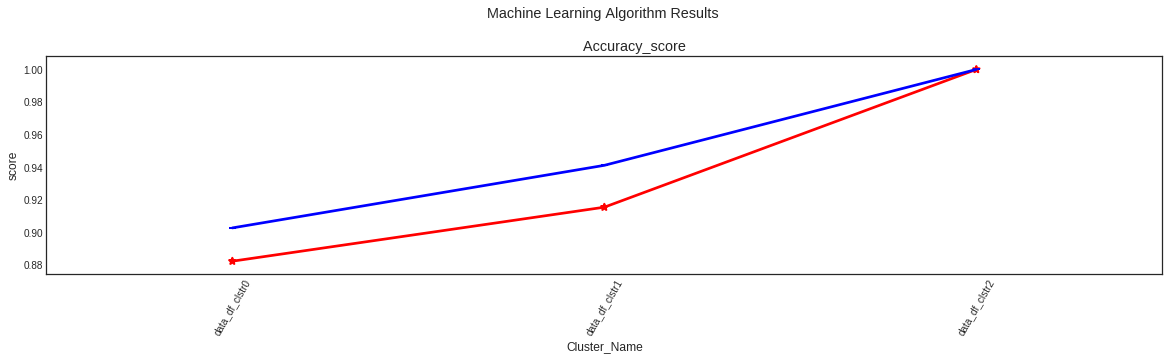

In [0]:
plt.figure(figsize=(20,4))
sns.pointplot(y=Accuracy_KMeans_SVC['Train_Accuracy'].values, x =Accuracy_KMeans_SVC['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'r',markers=["*"],label = 'accuracy_score')
sns.pointplot(y=Accuracy_KMeans_SVC['Test_Accuracy'].values, x =Accuracy_KMeans_SVC['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'b',markers=["_"],label = 'accuracy_score')
plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('Cluster_Name')
plt.ylabel('score')
plt.xticks(rotation=60)


In [0]:
#*****************************************************************************************************************************************************

In [0]:
##########################################################################################################################################

##               MODEL PREPARATION ON THE DIFFERENT DATASETS WITH PCA - BASED ON KMEANS CLUSTERS -SIZE 3

##########################################################################################################################################


In [0]:
###########################################   DATASET - data_df_clstr0 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr0  ######################################
  dataset=data_df_clstr0.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (117, 19)] , data_valid_df[shape - (51, 19)] , data_test_df[shape - (72, 19)] 


In [0]:
data_valid_df.head()

compactness  circularity  ...  hollows_ratio  class_cd
0         84.0         35.0  ...          190.0         1
1         85.0         40.0  ...          186.0         1
2         85.0         43.0  ...          181.0         0
3         89.0         38.0  ...          193.0         2
4         86.0         35.0  ...          183.0         2

[5 rows x 19 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(117, 18)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00862069  0.09356279  0.11848831  0.00324582 -0.22646137  0.22133207
  -0.07856677  0.12426308 -0.03102922  0.25759229 -0.05616836 -0.09101269
  -0.0278793  -0.17877814  0.18458855 -0.17343622  0.37591154  0.19779549]
 [ 0.09356279  1.00862069  0.67657503  0.45644771  0.2989877   0.55563701
   0.82704666 -0.82238652  0.82130337  0.93629671  0.72991979  0.84121565
   0.86648673 -0.00173097 -0.27047298 -0.37160006 -0.03282241  0.16553047]
 [ 0.11848831  0.67657503  1.00862069  0.56119589  0.19659401  0.65077177
   0.73828816 -0.74818893  0.77326566  0.66900046  0.67289821  0.75917296
   0.52787522 -0.42854298 -0.05938633  0.02614454  0.28594577  0.5357444 ]
 [ 0.00324582  0.45644771  0.56119589  1.00862069  0.75224811  0.28494932
   0.45281681 -0.51805839  0.45439278  0.35775454  0.67396002  0.49970167
   0.41584287 -0.47604745  0.06426797 -0.04010912  0.36270671  0.41186134]
 [-0.22646137  0.2989877   0.19659401  0.75224811  1.00862069  0.01481996
   0.2167957

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-7.88756665e-03  1.80004856e-01  5.50772393e-01  3.21141138e-01
   1.49013584e-01 -4.96343285e-01 -3.08759889e-01 -8.80120623e-02
  -2.88291600e-01  1.28345101e-02  2.58189081e-01 -1.04663953e-01
   1.03492923e-01 -8.65532928e-02 -6.63773577e-02 -2.20315578e-02
  -7.10356893e-02  1.95216584e-02]
 [-3.15875299e-01 -5.59009553e-02  9.34984599e-02  1.67658224e-01
  -1.27769738e-01  2.41858590e-03  1.69750567e-01 -2.40196066e-01
   1.09442425e-01  1.33579172e-01 -3.06463878e-01 -3.87812850e-01
  -4.98357017e-02 -3.74107242e-01 -3.87500165e-01  6.38068252e-02
   4.28716534e-01  5.29239172e-02]
 [-2.84395590e-01  1.97107543e-01  7.89129396e-02 -1.97086215e-01
   8.81121989e-02  1.03291278e-01 -2.91566465e-02 -7.83983098e-03
  -1.33210784e-01  8.12918471e-01 -2.51714838e-02  3.59781944e-01
  -2.19698461e-02 -5.49968522e-02 -1.50705380e-04  2.21944984e-02
  -5.61516435e-02 -6.47760177e-03]
 [-2.11341657e-01  2.56253867e-01 -3.83746966e-01  1.87538475e-01
   3.56193952e-02 -

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(8.428134403496834, array([-0.00788757, -0.3158753 , -0.28439559, -0.21134166, -0.11863879,
       -0.2290177 , -0.32446444,  0.3266239 , -0.3249003 , -0.29996489,
       -0.29892321, -0.33063261, -0.28613539,  0.03958069,  0.07282729,
        0.07692146, -0.00184577, -0.08516715])), (3.2909823563359675, array([ 0.18000486, -0.05590096,  0.19710754,  0.25625387,  0.13612847,
        0.08209646, -0.10842948,  0.07918607, -0.0707819 , -0.03529517,
       -0.03684922, -0.07825594, -0.13363788, -0.51034211,  0.15432744,
        0.13262777,  0.49976308,  0.48315804])), (1.6558173513918912, array([ 0.55077239,  0.09349846,  0.07891294, -0.38374697, -0.55391485,
        0.306319  , -0.01685477,  0.08199956,  0.03938686,  0.25917506,
       -0.13257383, -0.0423991 , -0.01891862,  0.0159681 , -0.03995293,
       -0.16383351,  0.06676161,  0.07178874])), (1.2993012313457486, array([ 0.32114114,  0.16765822, -0.19708622,  0.18753848,  0.28326154,
       -0.28923498, -0.09606008,  0.06366736, -0.

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.18000486, -0.05590096,  0.19710754,  0.25625387,  0.13612847,
        0.08209646, -0.10842948,  0.07918607, -0.0707819 , -0.03529517,
       -0.03684922, -0.07825594, -0.13363788, -0.51034211,  0.15432744,
        0.13262777,  0.49976308,  0.48315804])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[8.428134403496834, 3.2909823563359675, 1.6558173513918912, 1.2993012313457486, 1.0464475546421461, 0.6440869695024334, 0.4668340567412478, 0.4230406027365243, 0.28685285531089244, 0.1566001779773163, 0.13208237852896426, 0.10774957526383058, 0.08944679653795586, 0.05553856375202296, 0.03180074271735307, 0.020587482978480415, 0.014434949206721627, 0.005434365326793617]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.46422773, 0.64549741, 0.73670102, 0.80826747, 0.86590656,
       0.90138334, 0.92709689, 0.95039827, 0.96619834, 0.97482399,
       0.98209918, 0.9880341 , 0.9929609 , 0.99602   , 0.99777161,
       0.99890558, 0.99970067, 1.        ])

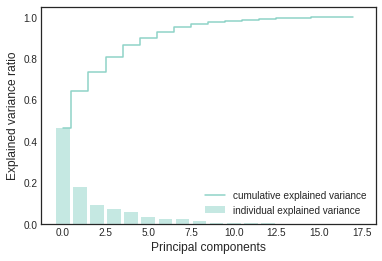

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.00788757, -0.3158753 , -0.28439559, -0.21134166, -0.11863879,
        -0.2290177 , -0.32446444,  0.3266239 , -0.3249003 , -0.29996489,
        -0.29892321, -0.33063261, -0.28613539,  0.03958069,  0.07282729,
         0.07692146, -0.00184577, -0.08516715]),
 array([ 0.18000486, -0.05590096,  0.19710754,  0.25625387,  0.13612847,
         0.08209646, -0.10842948,  0.07918607, -0.0707819 , -0.03529517,
        -0.03684922, -0.07825594, -0.13363788, -0.51034211,  0.15432744,
         0.13262777,  0.49976308,  0.48315804]),
 array([ 0.55077239,  0.09349846,  0.07891294, -0.38374697, -0.55391485,
         0.306319  , -0.01685477,  0.08199956,  0.03938686,  0.25917506,
        -0.13257383, -0.0423991 , -0.01891862,  0.0159681 , -0.03995293,
        -0.16383351,  0.06676161,  0.07178874]),
 array([ 0.32114114,  0.16765822, -0.19708622,  0.18753848,  0.28326154,
        -0.28923498, -0.09606008,  0.06366736, -0.11315897,  0.11075741,
        -0.01436816, -0.08184   ,  0.19007175,  0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  1.597177  0.754714  1.924372  1.624351 -0.387075
1 -2.071885 -1.583794 -0.858408  0.858787 -0.687104
2 -0.870074 -2.645583  0.523254  0.236139  0.187744
3  1.560084  3.602388 -0.978309 -3.248495  0.134326
4 -2.164450  1.163963 -2.019388  0.141849 -0.344537

In [0]:
X_train_std_5D.shape

(117, 5)

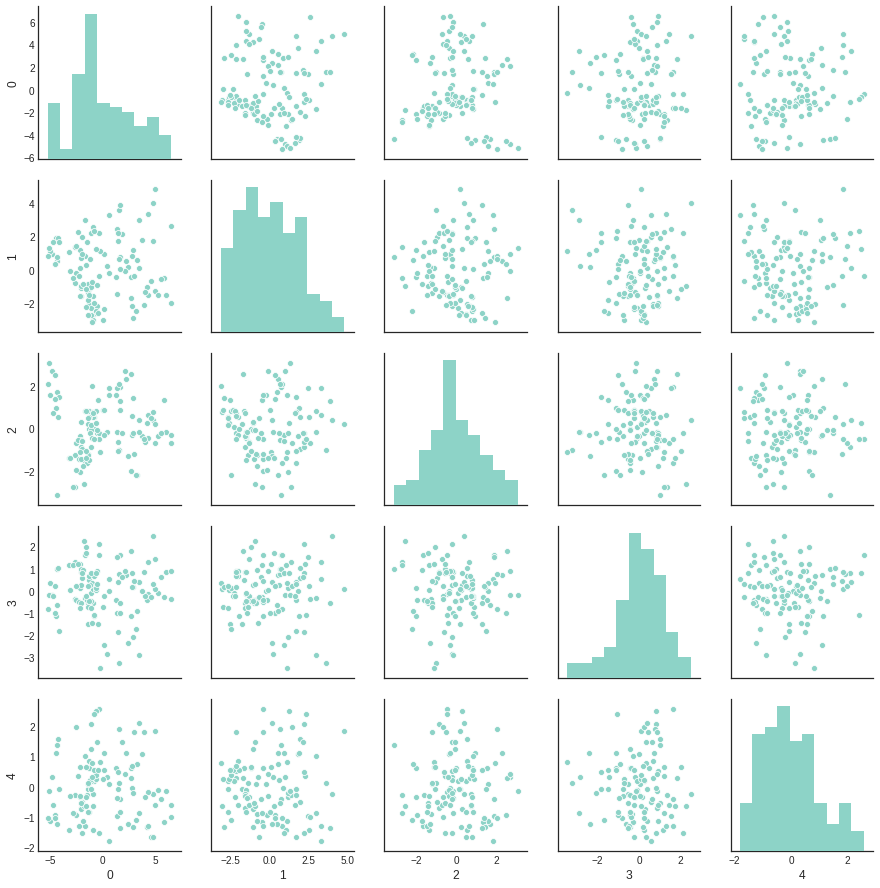

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(51, 18)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.02        0.29954819  0.31154822  0.15686804 -0.28258503  0.42144285
   0.2510905  -0.2519418   0.26641911  0.40247537  0.32665789  0.25793001
   0.20472343 -0.36140335  0.20369891 -0.16613254  0.63404991  0.48757867]
 [ 0.29954819  1.02        0.63912034  0.51435984  0.2176122   0.75857312
   0.88267415 -0.85820995  0.89452018  0.97530224  0.80740905  0.8794994
   0.94429148 -0.15500018 -0.0916166  -0.22989598  0.16885741  0.34084019]
 [ 0.31154822  0.63912034  1.02        0.41507913  0.06563322  0.70215028
   0.67572017 -0.66730685  0.65441738  0.62364907  0.68401251  0.67754549
   0.46224687 -0.340019   -0.08805088  0.00720284  0.36412562  0.50017371]
 [ 0.15686804  0.51435984  0.41507913  1.02        0.71687768  0.43815806
   0.59648274 -0.6474193   0.56135065  0.41440843  0.67250004  0.61305519
   0.47989886 -0.54438213 -0.14303135 -0.09034617  0.45026388  0.44877455]
 [-0.28258503  0.2176122   0.06563322  0.71687768  1.02        0.05797244
   0.1895897 

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 1.28787401e-01  3.11424204e-01  3.87941618e-01 -3.06782514e-01
   1.40712453e-01 -1.21553741e-02 -4.08781660e-01 -3.60895762e-01
  -4.65891465e-01  9.92865284e-02  2.57059713e-01  8.14221037e-02
  -4.14107556e-02  1.34444814e-01  6.53682741e-02  1.45657070e-02
   2.49037903e-02  1.03030947e-03]
 [ 2.96196750e-01 -1.49385831e-01  6.79572331e-02 -6.67784804e-02
  -2.08822402e-02  3.30200662e-01 -2.67002591e-03 -1.98653122e-01
   2.28167142e-01  4.77922549e-02 -2.41077694e-01 -2.18966941e-02
   5.12610770e-02  1.62507903e-01  5.34973822e-01  5.46712014e-01
  -6.72355158e-02  1.85650023e-02]
 [ 2.40202438e-01  8.23106153e-02  9.25567345e-02  2.10378895e-01
   3.78035422e-02 -2.30492535e-01  6.69822385e-01 -5.75885937e-01
   2.46233457e-02  8.92023244e-02  1.59819899e-01 -8.09743344e-02
  -3.53201513e-02  4.95232075e-03 -5.44692548e-02 -5.31039036e-02
   1.02358438e-02 -3.58110417e-03]
 [ 2.20047311e-01  1.21636182e-01 -4.65506811e-01 -1.03313303e-01
  -1.43899475e-01 -

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(9.554468435750161, array([ 0.1287874 ,  0.29619675,  0.24020244,  0.22004731,  0.08321421,
        0.28071219,  0.31161107, -0.31064165,  0.30707259,  0.29067039,
        0.30473961,  0.3132518 ,  0.26508152, -0.12956809, -0.03876464,
       -0.05771575,  0.12523691,  0.1813551 ])), (2.713759899886942, array([ 0.3114242 , -0.14938583,  0.08231062,  0.12163618, -0.02983369,
        0.08520139, -0.13039432,  0.10464796, -0.1362433 , -0.10853493,
       -0.05165791, -0.11571439, -0.22365406, -0.49437735,  0.11921402,
        0.13958927,  0.50994726,  0.43410984])), (1.7523352779570867, array([ 0.38794162,  0.06795723,  0.09255673, -0.46550681, -0.66951092,
        0.14273707,  0.02552889,  0.01958732,  0.04939234,  0.17564208,
       -0.02612818,  0.00911941,  0.00651173,  0.18722265,  0.28368711,
        0.01225185, -0.00648756, -0.01203154])), (1.2208754476848094, array([-0.30678251, -0.06677848,  0.2103789 , -0.1033133 , -0.18495274,
        0.18205977,  0.06914858, -0.02316919,  0.0

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.3114242 , -0.14938583,  0.08231062,  0.12163618, -0.02983369,
        0.08520139, -0.13039432,  0.10464796, -0.1362433 , -0.10853493,
       -0.05165791, -0.11571439, -0.22365406, -0.49437735,  0.11921402,
        0.13958927,  0.50994726,  0.43410984])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.554468435750161, 2.713759899886942, 1.7523352779570867, 1.2208754476848094, 0.9134283240323067, 0.5614667981890057, 0.473221931447275, 0.4003654346860703, 0.2761247845471543, 0.16668655349191655, 0.10981292923772439, 0.09561485481798823, 0.052075494819210956, 0.03768412660177896, 0.016807138259603314, 0.010369989298013938, 0.004357867578492363, 0.0005447117144917516]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.52039588, 0.66820416, 0.76364726, 0.83014374, 0.87989474,
       0.91047572, 0.93625033, 0.95805673, 0.97309621, 0.98217499,
       0.98815609, 0.99336387, 0.99620023, 0.99825274, 0.99916816,
       0.99973297, 0.99997033, 1.        ])

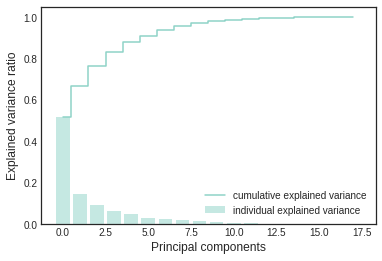

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.1287874 ,  0.29619675,  0.24020244,  0.22004731,  0.08321421,
         0.28071219,  0.31161107, -0.31064165,  0.30707259,  0.29067039,
         0.30473961,  0.3132518 ,  0.26508152, -0.12956809, -0.03876464,
        -0.05771575,  0.12523691,  0.1813551 ]),
 array([ 0.3114242 , -0.14938583,  0.08231062,  0.12163618, -0.02983369,
         0.08520139, -0.13039432,  0.10464796, -0.1362433 , -0.10853493,
        -0.05165791, -0.11571439, -0.22365406, -0.49437735,  0.11921402,
         0.13958927,  0.50994726,  0.43410984]),
 array([ 0.38794162,  0.06795723,  0.09255673, -0.46550681, -0.66951092,
         0.14273707,  0.02552889,  0.01958732,  0.04939234,  0.17564208,
        -0.02612818,  0.00911941,  0.00651173,  0.18722265,  0.28368711,
         0.01225185, -0.00648756, -0.01203154]),
 array([-0.30678251, -0.06677848,  0.2103789 , -0.1033133 , -0.18495274,
         0.18205977,  0.06914858, -0.02316919,  0.09830949, -0.02570958,
        -0.00149571,  0.0524932 , -0.17024061, -0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -4.704881  2.383596 -0.470912  1.264057 -1.225647
1  0.092001  0.024889 -0.958676  1.520459 -0.137870
2  0.076234 -2.824191  1.180709 -0.838517 -0.232543
3  0.166565  3.495129 -0.805961 -0.543258  0.315986
4 -5.521297 -1.121981  0.691465 -1.510933  0.825233

In [0]:
X_valid_std_5D.shape

(51, 5)

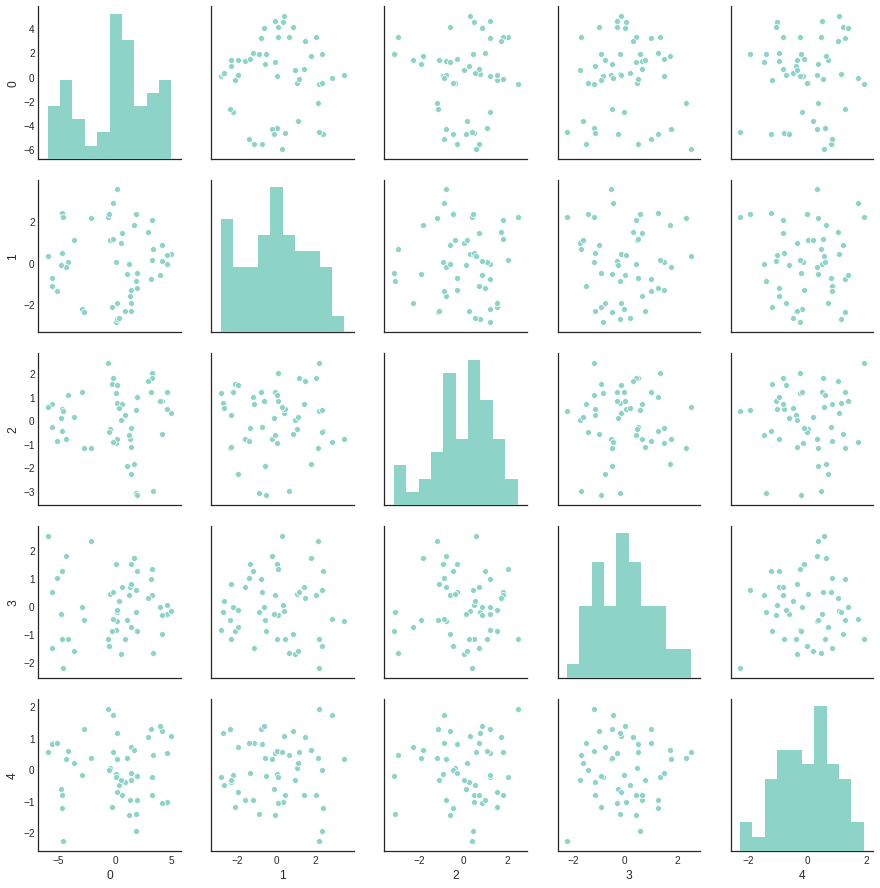

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.49019607843137253
Confusion Matrix:
 [[ 4  4  1]
 [ 8  9  7]
 [ 1  5 12]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
7         0.888889        {'C': 1, 'kernel': 'rbf'}
6         0.880342     {'C': 1, 'kernel': 'linear'}
4         0.871795   {'C': 0.5, 'kernel': 'linear'}
5         0.871795      {'C': 0.5, 'kernel': 'rbf'}
2         0.846154  {'C': 0.05, 'kernel': 'linear'}
0         0.794872  {'C': 0.01, 'kernel': 'linear'}
1         0.410256     {'C': 0.01, 'kernel': 'rbf'}
3         0.410256     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
####################################################### APPLYING PCA on TEST SET ###################################################################

In [0]:
X_test_clstr_z.shape

(72, 18)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01408451 -0.04148208  0.07960958 -0.16197188 -0.42904088  0.31639085
  -0.20869207  0.25339466 -0.11275538  0.19744173 -0.14060395 -0.22694273
  -0.22681514 -0.1942067   0.00813815  0.10452026  0.44690878  0.1977797 ]
 [-0.04148208  1.01408451  0.38865399  0.33268643  0.30734352  0.59391157
   0.7806204  -0.75430534  0.74118535  0.92318544  0.62257871  0.78561734
   0.85808833  0.06020678 -0.06665013 -0.23776268 -0.12555682  0.1997215 ]
 [ 0.07960958  0.38865399  1.01408451  0.26315049  0.09544116  0.48617676
   0.52475196 -0.48527912  0.52270305  0.50663561  0.42506894  0.53576503
   0.10292753 -0.25081328  0.02469455  0.24355889  0.21925433  0.45428373]
 [-0.16197188  0.33268643  0.26315049  1.01408451  0.59614455  0.20789394
   0.34422703 -0.39452502  0.31578498  0.28671883  0.76371178  0.37220584
   0.34453698 -0.1357957  -0.10375069 -0.12718511  0.13847975  0.29979778]
 [-0.42904088  0.30734352  0.09544116  0.59614455  1.01408451 -0.04544539
   0.2619882

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.04879309 -0.31896328 -0.31905651 -0.37865639 -0.18569958 -0.39277894
  -0.172062   -0.10656225 -0.33397103  0.3172701  -0.43113985  0.05821498
  -0.10463091  0.05294938 -0.07373648 -0.00776838 -0.00507532 -0.0155405 ]
 [ 0.3205357   0.03719459 -0.05841307 -0.29374016  0.09549193 -0.01111812
   0.18107441 -0.2123236  -0.04589161 -0.35360392  0.03625022 -0.01462997
  -0.09598963 -0.23991725 -0.43280186 -0.57601494  0.05657786  0.03620205]
 [ 0.20425344 -0.23580838 -0.10884288  0.39049837 -0.07294669  0.07331515
  -0.35128044 -0.57466476  0.00308103 -0.35506247 -0.13333767 -0.04288881
   0.11659137  0.32227669  0.07898693 -0.00851222  0.00089319 -0.06738018]
 [ 0.18686655 -0.05770652  0.43914337  0.13670537 -0.11177829 -0.56921867
  -0.00758467  0.0854084   0.23335758 -0.02668203 -0.18321287 -0.29436717
  -0.03423712 -0.16305985  0.36331699 -0.26483361 -0.02922152 -0.01489409]
 [ 0.13589652  0.05923421  0.56043467  0.02183     0.13885649  0.01061367
   0.18877531 -0

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(7.6253247172312495, array([-0.04879309,  0.3205357 ,  0.20425344,  0.18686655,  0.13589652,
        0.24169618,  0.34411359, -0.34022411,  0.32973386,  0.30720753,
        0.29473794,  0.34684204,  0.28232518, -0.00269724, -0.03228055,
       -0.04047447, -0.03082634,  0.1164904 ])), (3.098988593582798, array([-0.31896328,  0.03719459, -0.23580838, -0.05770652,  0.05923421,
       -0.2738198 ,  0.09351814, -0.08924581,  0.03712291, -0.09432946,
        0.0236059 ,  0.08303983,  0.15087099,  0.45691643, -0.02588339,
       -0.13219881, -0.50236443, -0.47219354])), (1.9599048079087682, array([-0.31905651, -0.05841307, -0.10884288,  0.43914337,  0.56043467,
       -0.23978352, -0.0899819 ,  0.00410583, -0.15023392, -0.19305681,
        0.15741153, -0.05392306,  0.0305828 , -0.23019497, -0.16695279,
       -0.30959198,  0.15956633,  0.14059267])), (1.2236699017714612, array([-0.37865639, -0.29374016,  0.39049837,  0.13670537,  0.02183   ,
       -0.11583638,  0.09667175, -0.09025785,  0.

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.31896328,  0.03719459, -0.23580838, -0.05770652,  0.05923421,
       -0.2738198 ,  0.09351814, -0.08924581,  0.03712291, -0.09432946,
        0.0236059 ,  0.08303983,  0.15087099,  0.45691643, -0.02588339,
       -0.13219881, -0.50236443, -0.47219354])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[7.6253247172312495, 3.098988593582798, 1.9599048079087682, 1.2236699017714612, 1.0499090558031292, 0.8358923463664052, 0.6573349961616967, 0.5066379771363558, 0.34727431236313633, 0.3314030750450349, 0.22147596845493847, 0.16262543712702934, 0.09793155112869496, 0.07409248753876305, 0.039054218092860325, 0.01513139087231186, 0.00605253311999361, 0.0008177570559270951]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.41774541, 0.58752025, 0.69489158, 0.76192905, 0.81944722,
       0.8652407 , 0.90125211, 0.92900774, 0.9480328 , 0.96618837,
       0.9783217 , 0.98723096, 0.99259604, 0.99665512, 0.99879466,
       0.99962362, 0.9999552 , 1.        ])

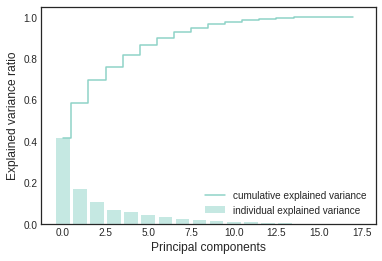

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.04879309,  0.3205357 ,  0.20425344,  0.18686655,  0.13589652,
         0.24169618,  0.34411359, -0.34022411,  0.32973386,  0.30720753,
         0.29473794,  0.34684204,  0.28232518, -0.00269724, -0.03228055,
        -0.04047447, -0.03082634,  0.1164904 ]),
 array([-0.31896328,  0.03719459, -0.23580838, -0.05770652,  0.05923421,
        -0.2738198 ,  0.09351814, -0.08924581,  0.03712291, -0.09432946,
         0.0236059 ,  0.08303983,  0.15087099,  0.45691643, -0.02588339,
        -0.13219881, -0.50236443, -0.47219354]),
 array([-0.31905651, -0.05841307, -0.10884288,  0.43914337,  0.56043467,
        -0.23978352, -0.0899819 ,  0.00410583, -0.15023392, -0.19305681,
         0.15741153, -0.05392306,  0.0305828 , -0.23019497, -0.16695279,
        -0.30959198,  0.15956633,  0.14059267]),
 array([-0.37865639, -0.29374016,  0.39049837,  0.13670537,  0.02183   ,
        -0.11583638,  0.09667175, -0.09025785,  0.08595517, -0.26341313,
         0.1083215 ,  0.10387459, -0.22614291,  0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -2.960634  2.483972  1.445264 -0.102618 -0.357834
1  0.588046  1.343058  1.076215 -0.083037  0.040645
2 -0.340656  0.826978  0.345216  3.408293  1.749183
3  1.135518  2.729774 -0.735650 -0.501260 -0.119876
4 -0.646239 -1.109032  1.230000  1.336396 -0.480154

In [0]:
X_test_std_5D.shape

(72, 5)

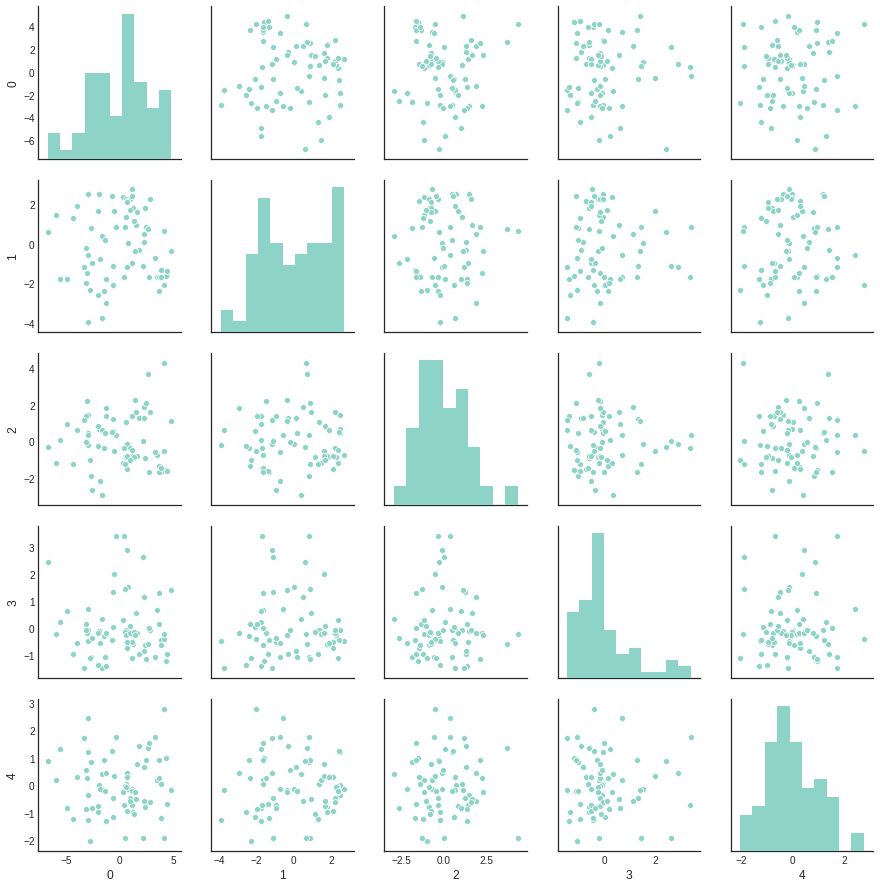

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.18055555555555555
Confusion Matrix:
 [[ 0  4 11]
 [13 10 13]
 [11  7  3]]


In [0]:
Accuracy_KMeans_SVC.loc[3,'Cluster_Name']='data_df_clstr0'
Accuracy_KMeans_SVC.loc[3,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[3,'PCA_Applied']='Y'

Accuracy_KMeans_SVC.loc[3,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[3,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No
2  data_df_clstr2  model_SVC              1             1          No
4  data_df_clstr1  model_SVC       0.352113      0.647059           Y
3  data_df_clstr0  model_SVC       0.490196      0.180556           Y
5  data_df_clstr2  model_SVC       0.508772      0.567901           Y

In [0]:
###########################################   DATASET - data_df_clstr1 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr1  ######################################
  dataset=data_df_clstr1.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (164, 19)] , data_valid_df[shape - (71, 19)] , data_test_df[shape - (102, 19)] 


In [0]:
data_valid_df.head()

compactness  circularity  ...  hollows_ratio  class_cd
0         94.0         39.0  ...          209.0         1
1         93.0         43.0  ...          194.0         1
2         88.0         45.0  ...          193.0         1
3         87.0         42.0  ...          201.0         2
4         95.0         46.0  ...          200.0         2

[5 rows x 19 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(164, 18)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00613497  0.1250717   0.18530642  0.48551999  0.26355885 -0.04787002
   0.38095424 -0.39356592  0.41537618  0.12972024  0.28925698  0.40138791
   0.02208055 -0.11363496  0.1612532  -0.11278717  0.32066349  0.20284174]
 [ 0.1250717   1.00613497  0.37277663  0.23123818  0.24932123  0.33215394
   0.34238356 -0.32632117  0.34884305  0.92959895  0.27775646  0.31825871
   0.92610604  0.2577527   0.29477185 -0.36389488 -0.25143708 -0.16766735]
 [ 0.18530642  0.37277663  1.00613497  0.38084761 -0.00841187  0.41763765
   0.66939143 -0.59108241  0.67906737  0.35600139  0.55941476  0.62041167
   0.29376967  0.10170089  0.00887633  0.21554854 -0.29480835 -0.12571719]
 [ 0.48551999  0.23123818  0.38084761  1.00613497  0.65479167 -0.14582954
   0.81923021 -0.85500032  0.74979619  0.07680364  0.74942886  0.8432812
   0.20255791  0.01722485 -0.07327235  0.08013032  0.28080743  0.13893396]
 [ 0.26355885  0.24932123 -0.00841187  0.65479167  1.00613497 -0.101184
   0.28434416 -

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 1.56661977e-01  1.84041359e-01  2.23185811e-01  9.88874922e-02
  -1.82732902e-01 -6.99315941e-01 -2.93381510e-01 -4.60771576e-01
   2.79232413e-02 -1.93598608e-02  2.34911291e-01 -4.11189464e-03
  -2.37899367e-02  3.89354751e-02  1.13892962e-03 -3.37251523e-02
  -1.46159455e-02 -3.72683719e-02]
 [ 2.07893480e-01 -3.22610535e-01  3.40445021e-01  2.36738521e-02
   4.37066972e-02  1.78210532e-01  7.17303555e-02 -1.74140970e-01
   3.31500580e-02 -1.58460466e-02 -1.95324028e-02 -5.10551657e-02
  -7.24976887e-02 -2.39620277e-01  1.13492201e-02 -8.55788712e-02
  -8.43487120e-02 -7.65193228e-01]
 [ 2.64825366e-01 -5.75156413e-02 -2.49447950e-02 -4.27034481e-01
  -9.67104322e-02 -5.15156811e-02 -1.01322283e-01  2.31583473e-01
   7.68120556e-01  1.64897001e-01  1.30706734e-01 -8.32272112e-02
   8.32418884e-02 -1.26149263e-01 -1.96310092e-02  7.88860578e-03
  -8.73215968e-03  5.56504123e-02]
 [ 3.10290325e-01  2.37354604e-01  7.28047848e-02  2.00329034e-01
  -1.00712930e-01  

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(6.78164134041732, array([ 0.15666198,  0.20789348,  0.26482537,  0.31029033,  0.15784757,
        0.05175251,  0.3689796 , -0.36331776,  0.35383366,  0.15943415,
        0.34560917,  0.36412824,  0.19459349,  0.1261177 , -0.03072685,
        0.02647775, -0.06905731, -0.08512249])), (3.4910821339669433, array([ 0.18404136, -0.32261054, -0.05751564,  0.2373546 ,  0.03108272,
       -0.27510122,  0.10978904, -0.1319968 ,  0.10204833, -0.34290933,
        0.07381489,  0.13702001, -0.33198778, -0.3122563 , -0.05466964,
        0.18672138,  0.41844463,  0.35126789])), (2.5047379533846676, array([ 0.22318581,  0.34044502, -0.0249448 ,  0.07280478,  0.06858871,
        0.04551744, -0.06290783,  0.05048456, -0.03169493,  0.32601854,
       -0.15374425, -0.05165239,  0.27653915, -0.32249725,  0.40630614,
       -0.28346236,  0.34014425,  0.3739922 ])), (1.6390106145300947, array([ 9.88874922e-02,  2.36738521e-02, -4.27034481e-01,  2.00329034e-01,
        5.53469195e-01, -3.95684581e-01, -7.611

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.18404136, -0.32261054, -0.05751564,  0.2373546 ,  0.03108272,
       -0.27510122,  0.10978904, -0.1319968 ,  0.10204833, -0.34290933,
        0.07381489,  0.13702001, -0.33198778, -0.3122563 , -0.05466964,
        0.18672138,  0.41844463,  0.35126789])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[6.78164134041732, 3.4910821339669433, 2.5047379533846676, 1.6390106145300947, 0.9388847357131435, 0.7902188718625434, 0.6662326084917594, 0.4647605617324147, 0.28397666187122234, 0.15935191513789018, 0.11599411567954918, 0.11200747684655314, 0.06453559886963972, 0.04653035254075159, 0.020290207558764206, 0.01728386518653059, 0.01238708265781934, 0.0015033514051687217]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.37446055, 0.56722694, 0.70553056, 0.79603148, 0.8478737 ,
       0.89150706, 0.92829429, 0.95395688, 0.96963717, 0.97843607,
       0.98484089, 0.99102559, 0.99458904, 0.99715829, 0.99827865,
       0.99923301, 0.99991699, 1.        ])

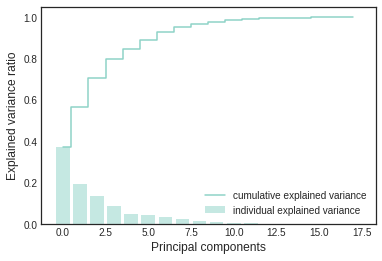

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.15666198,  0.20789348,  0.26482537,  0.31029033,  0.15784757,
         0.05175251,  0.3689796 , -0.36331776,  0.35383366,  0.15943415,
         0.34560917,  0.36412824,  0.19459349,  0.1261177 , -0.03072685,
         0.02647775, -0.06905731, -0.08512249]),
 array([ 0.18404136, -0.32261054, -0.05751564,  0.2373546 ,  0.03108272,
        -0.27510122,  0.10978904, -0.1319968 ,  0.10204833, -0.34290933,
         0.07381489,  0.13702001, -0.33198778, -0.3122563 , -0.05466964,
         0.18672138,  0.41844463,  0.35126789]),
 array([ 0.22318581,  0.34044502, -0.0249448 ,  0.07280478,  0.06858871,
         0.04551744, -0.06290783,  0.05048456, -0.03169493,  0.32601854,
        -0.15374425, -0.05165239,  0.27653915, -0.32249725,  0.40630614,
        -0.28346236,  0.34014425,  0.3739922 ]),
 array([ 9.88874922e-02,  2.36738521e-02, -4.27034481e-01,  2.00329034e-01,
         5.53469195e-01, -3.95684581e-01, -7.61108275e-02, -1.73664442e-02,
        -1.35631335e-01, -7.77210119e-02, -6

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  4.947946  0.768802 -0.124055 -1.287105 -0.436325
1 -2.080039  3.583813  0.304981 -1.954054 -0.491451
2  0.283882  2.749169 -1.422430 -1.790476 -0.303845
3 -4.066252  1.013036 -1.050806 -0.744146 -0.625796
4  0.473657 -2.707697 -0.289223  2.015835  1.263186

In [0]:
X_train_std_5D.shape

(164, 5)

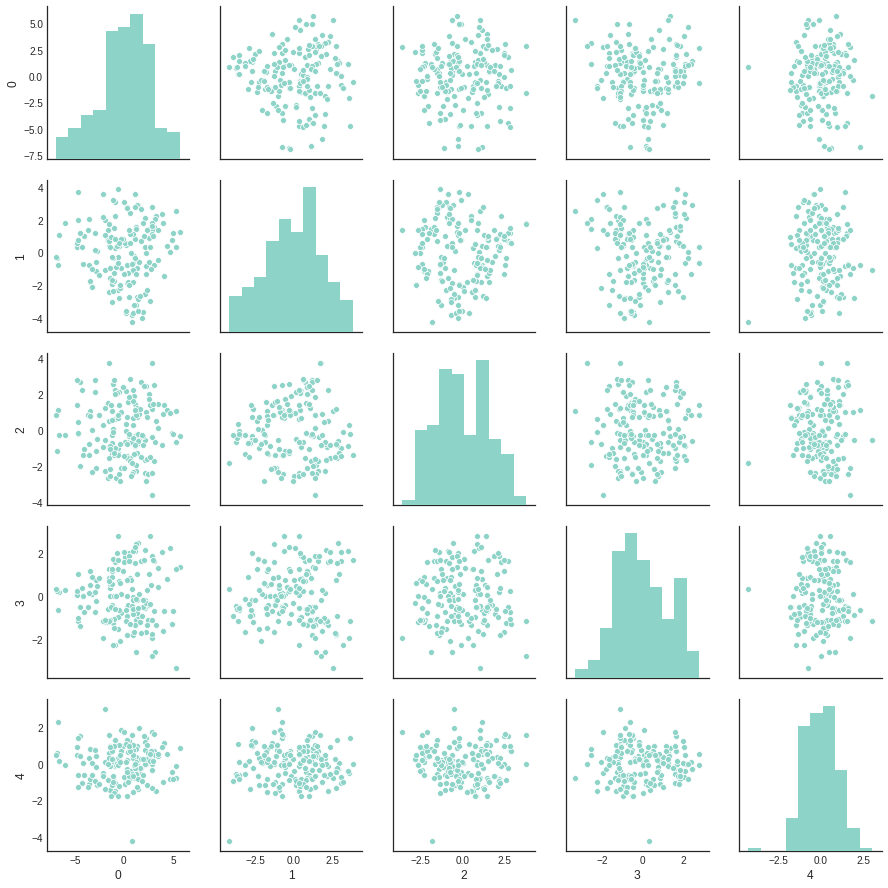

In [0]:

sns.pairplot(Proj_data_df)

In [0]:

#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(71, 18)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01428571  0.14012635  0.33273962  0.27913712  0.25792456  0.088569
   0.50418315 -0.51099281  0.50064555  0.212999    0.27519813  0.51551996
   0.04073446 -0.04966874  0.00988045  0.01622039  0.30492167  0.30785329]
 [ 0.14012635  1.01428571  0.43265114  0.22595473  0.12016758  0.11969168
   0.35229275 -0.31618407  0.38019515  0.93080691  0.32340079  0.35058036
   0.9458127   0.38071342  0.33594579 -0.4009254  -0.40466297 -0.43698084]
 [ 0.33273962  0.43265114  1.01428571  0.48898519  0.13291019  0.37758179
   0.81488137 -0.78037376  0.79723801  0.39289583  0.65335827  0.78780793
   0.34567653  0.23348533 -0.08871081  0.175299   -0.2793625  -0.21322706]
 [ 0.27913712  0.22595473  0.48898519  1.01428571  0.52451174 -0.05298208
   0.6547248  -0.67250576  0.58046519  0.15086051  0.84699047  0.6574785
   0.2015469   0.37467908 -0.26374339  0.05534793  0.02173844  0.01822745]
 [ 0.25792456  0.12016758  0.13291019  0.52451174  1.01428571 -0.1948683
   0.26628608 -0

In [0]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 1.65630281e-01 -1.89478067e-01  3.49716392e-01 -2.13740750e-02
  -1.45760628e-01 -6.40037728e-01 -6.37759854e-02  3.73801579e-01
  -2.83763735e-01  1.44214244e-01  3.48646339e-01  1.12727520e-01
   1.58214221e-02 -1.07070852e-03 -7.52509582e-03  3.15691658e-02
   4.22004362e-02 -2.34492445e-02]
 [ 2.22632433e-01  3.55302975e-01  2.37779860e-01 -2.09859863e-02
  -9.62366420e-03  6.28799799e-02  1.76567669e-02 -2.72439693e-01
  -2.30965808e-01 -5.84383161e-02 -5.59185878e-02  8.30163966e-02
   2.48132685e-03  2.68868043e-02 -2.34310895e-01  6.24438852e-01
   3.83815333e-01 -1.70251793e-01]
 [ 3.11851843e-01 -3.77654515e-02  2.72523813e-02  2.93869060e-01
  -5.65516798e-02  5.05036997e-02  2.75481550e-02 -1.12222873e-01
   3.26597704e-01 -6.21904154e-01  4.93819915e-01  1.66744475e-01
   9.57652160e-02  1.55216057e-02 -6.85009727e-03 -1.89293713e-02
  -1.18915117e-02  1.41660426e-01]
 [ 2.68805856e-01 -1.46438299e-01 -4.83286114e-02 -2.86222206e-01
  -2.50279606e-01  

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(7.079126838040535, array([ 0.16563028,  0.22263243,  0.31185184,  0.26880586,  0.13088904,
        0.04072993,  0.35178934, -0.34647944,  0.34488227,  0.18398585,
        0.32739641,  0.34815063,  0.20864278,  0.17455563, -0.05304617,
        0.01636576, -0.12543947, -0.12995583])), (3.6468163310134574, array([-0.18947807,  0.35530297, -0.03776545, -0.1464383 , -0.07394804,
        0.04551125, -0.15732935,  0.16961585, -0.12967911,  0.34649025,
       -0.09832788, -0.16425357,  0.38814407,  0.24720724,  0.24463436,
       -0.25904537, -0.34191156, -0.35324893])), (2.096278163889215, array([ 0.34971639,  0.23777986,  0.02725238, -0.04832861, -0.02339664,
        0.085199  ,  0.0236175 , -0.02008889,  0.02339287,  0.29370224,
       -0.12994728,  0.04132808,  0.14827713, -0.33787999,  0.40657584,
       -0.29190463,  0.41086048,  0.38528317])), (1.6123116109804703, array([-0.02137407, -0.02098599,  0.29386906, -0.28622221, -0.51921872,
        0.58052275,  0.06055362,  0.00120741,  0.1

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.18947807,  0.35530297, -0.03776545, -0.1464383 , -0.07394804,
        0.04551125, -0.15732935,  0.16961585, -0.12967911,  0.34649025,
       -0.09832788, -0.16425357,  0.38814407,  0.24720724,  0.24463436,
       -0.25904537, -0.34191156, -0.35324893])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[7.079126838040535, 3.6468163310134574, 2.096278163889215, 1.6123116109804703, 0.9848266961943367, 0.6746332111503022, 0.5832199157171047, 0.5080334014929812, 0.4630504132268169, 0.2004329051032825, 0.15410629112782784, 0.08493893256342354, 0.05536742137483965, 0.03931784310503006, 0.03718783855751323, 0.02336688360846291, 0.013047744891195593, 0.001080415106065482]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.3877456 , 0.58749297, 0.70231259, 0.79062387, 0.84456586,
       0.88151761, 0.91346236, 0.94128891, 0.96665161, 0.97762994,
       0.98607082, 0.99072318, 0.99375583, 0.99590939, 0.99794628,
       0.99922616, 0.99994082, 1.        ])

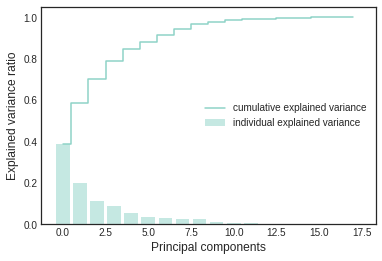

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.16563028,  0.22263243,  0.31185184,  0.26880586,  0.13088904,
         0.04072993,  0.35178934, -0.34647944,  0.34488227,  0.18398585,
         0.32739641,  0.34815063,  0.20864278,  0.17455563, -0.05304617,
         0.01636576, -0.12543947, -0.12995583]),
 array([-0.18947807,  0.35530297, -0.03776545, -0.1464383 , -0.07394804,
         0.04551125, -0.15732935,  0.16961585, -0.12967911,  0.34649025,
        -0.09832788, -0.16425357,  0.38814407,  0.24720724,  0.24463436,
        -0.25904537, -0.34191156, -0.35324893]),
 array([ 0.34971639,  0.23777986,  0.02725238, -0.04832861, -0.02339664,
         0.085199  ,  0.0236175 , -0.02008889,  0.02339287,  0.29370224,
        -0.12994728,  0.04132808,  0.14827713, -0.33787999,  0.40657584,
        -0.29190463,  0.41086048,  0.38528317]),
 array([-0.02137407, -0.02098599,  0.29386906, -0.28622221, -0.51921872,
         0.58052275,  0.06055362,  0.00120741,  0.10262563,  0.07914231,
        -0.0521799 ,  0.0267782 , -0.08676074, -0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  2.039387 -3.872126  0.865382  1.335029 -0.240470
1  0.159310  2.671387  0.264733  0.067403  1.349605
2  0.887396  2.400604 -0.738697  0.886647  0.727957
3 -2.573412  1.836640  0.283097  0.123844 -1.406062
4  2.414305  1.273269  0.709067  2.584052 -1.673549

In [0]:
X_valid_std_5D.shape

(71, 5)

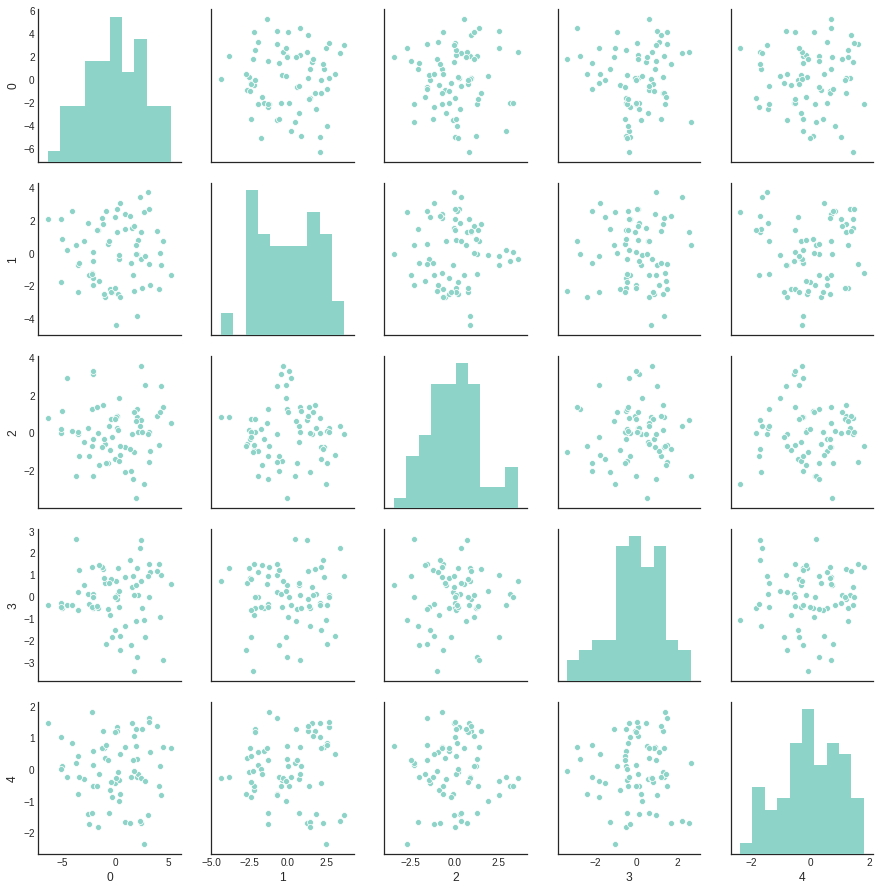

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 0.05, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.352112676056338
Confusion Matrix:
 [[ 0 13  4]
 [ 9 10  5]
 [ 4 11 15]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
2         0.902439  {'C': 0.05, 'kernel': 'linear'}
7         0.902439        {'C': 1, 'kernel': 'rbf'}
6         0.896341     {'C': 1, 'kernel': 'linear'}
4         0.890244   {'C': 0.5, 'kernel': 'linear'}
0         0.884146  {'C': 0.01, 'kernel': 'linear'}
5         0.884146      {'C': 0.5, 'kernel': 'rbf'}
1         0.323171     {'C': 0.01, 'kernel': 'rbf'}
3         0.323171     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
X_test_clstr_z.shape

(102, 18)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00990099  0.27653891  0.47503404  0.42029162 -0.01140009  0.41951998
   0.53384564 -0.51263745  0.52912976  0.31959414  0.47800405  0.52686914
   0.14489005 -0.19221088  0.31249901  0.07290812  0.24107436  0.32028754]
 [ 0.27653891  1.00990099  0.37012188  0.17252828  0.29741189  0.44181027
   0.34281998 -0.35718757  0.33347012  0.93496137  0.30866676  0.31072261
   0.91248288  0.35583672  0.32497573 -0.36101168 -0.30308233 -0.1932869 ]
 [ 0.47503404  0.37012188  1.00990099  0.51344503  0.13109585  0.57306731
   0.81903547 -0.76849084  0.80002219  0.34093084  0.76450451  0.79157433
   0.34229955  0.20659431  0.14369654  0.21073989 -0.30910024 -0.14700275]
 [ 0.42029162  0.17252828  0.51344503  1.00990099  0.58364923  0.13194113
   0.72312679 -0.73769822  0.66549321  0.10088504  0.71077915  0.72189681
   0.16629894  0.18423448  0.03393914  0.21003055  0.01645674 -0.04120263]
 [-0.01140009  0.29741189  0.13109585  0.58364923  1.00990099  0.03279187
   0.2266256

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-1.93811613e-01  2.22742367e-01  3.09698266e-01 -3.55219646e-02
   1.08614368e-01 -2.92677239e-02  2.75090768e-01 -7.84228388e-01
  -1.57189179e-01  2.20599009e-01  5.26963952e-02  1.86139017e-01
  -4.45551145e-03  1.24097501e-02 -9.81824197e-03  2.65346965e-02
  -2.29094952e-02  3.01728342e-03]
 [-2.11521969e-01 -3.15209501e-01  3.06084255e-01  7.02577561e-02
   8.25431046e-02  3.37861312e-02 -3.69527564e-01 -4.21890734e-02
   6.45006408e-02  5.46781564e-02 -1.24849890e-01  1.72346376e-02
  -5.71607583e-02  2.09209825e-02  6.34632481e-03 -1.36308206e-01
  -1.88478773e-01 -7.28085329e-01]
 [-3.04896368e-01  9.05404131e-02  2.63567048e-02 -2.49190574e-01
  -1.63299996e-01 -1.26984563e-01  1.98501113e-02  2.90028777e-01
  -1.22696809e-01  7.71863361e-01  1.89831708e-02 -2.75742762e-01
  -1.32052678e-01 -9.55558751e-03 -2.64139836e-02 -3.13184869e-02
  -2.06146030e-02  4.35042518e-02]
 [-2.55545172e-01  1.83755672e-01 -8.65653468e-02  4.24151815e-01
  -1.53167572e-01 -

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(7.54362513854902, array([-0.19381161, -0.21152197, -0.30489637, -0.25554517, -0.12950094,
       -0.1748525 , -0.34554772,  0.34183729, -0.33612313, -0.18930761,
       -0.33525021, -0.33778813, -0.20048843, -0.16086576, -0.05627261,
       -0.01028029,  0.13461521,  0.11425384])), (3.310578283156038, array([ 0.22274237, -0.3152095 ,  0.09054041,  0.18375567, -0.12861471,
       -0.05822388,  0.14811163, -0.13347344,  0.14575743, -0.31637194,
        0.13250661,  0.16949782, -0.33943634, -0.35211488, -0.03845211,
        0.30242601,  0.3608645 ,  0.34553149])), (2.5293720969438946, array([ 0.30969827,  0.30608426,  0.0263567 , -0.08656535, -0.07180939,
        0.28888125, -0.07114419,  0.08188279, -0.06517492,  0.34871438,
       -0.13699484, -0.07960426,  0.21138136, -0.31893877,  0.39520583,
       -0.1331494 ,  0.28571342,  0.38591376])), (1.3306135889961748, array([-0.03552196,  0.07025776, -0.24919057,  0.42415181,  0.67594617,
       -0.35635922, -0.02992886, -0.03816581, -0.06

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.22274237, -0.3152095 ,  0.09054041,  0.18375567, -0.12861471,
       -0.05822388,  0.14811163, -0.13347344,  0.14575743, -0.31637194,
        0.13250661,  0.16949782, -0.33943634, -0.35211488, -0.03845211,
        0.30242601,  0.3608645 ,  0.34553149])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[7.54362513854902, 3.310578283156038, 2.5293720969438946, 1.3306135889961748, 0.9128208152188527, 0.7488202564885924, 0.5603996827102661, 0.3984173134651025, 0.2237279747636885, 0.19049763293460806, 0.1285007679112506, 0.11460771386495076, 0.0728271660233505, 0.051698831194421466, 0.028180454946973715, 0.019957150984298747, 0.012634100549054077, 0.0009388530816382649]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.41498156, 0.59709943, 0.73624244, 0.80944069, 0.85965577,
       0.90084905, 0.93167713, 0.95359443, 0.9659019 , 0.97638135,
       0.98345029, 0.98975496, 0.99376125, 0.99660525, 0.99815548,
       0.99925334, 0.99994835, 1.        ])

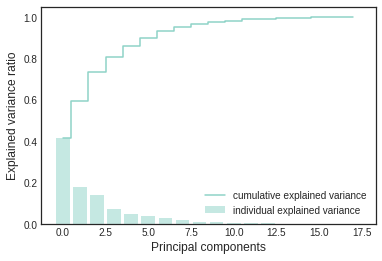

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.19381161, -0.21152197, -0.30489637, -0.25554517, -0.12950094,
        -0.1748525 , -0.34554772,  0.34183729, -0.33612313, -0.18930761,
        -0.33525021, -0.33778813, -0.20048843, -0.16086576, -0.05627261,
        -0.01028029,  0.13461521,  0.11425384]),
 array([ 0.22274237, -0.3152095 ,  0.09054041,  0.18375567, -0.12861471,
        -0.05822388,  0.14811163, -0.13347344,  0.14575743, -0.31637194,
         0.13250661,  0.16949782, -0.33943634, -0.35211488, -0.03845211,
         0.30242601,  0.3608645 ,  0.34553149]),
 array([ 0.30969827,  0.30608426,  0.0263567 , -0.08656535, -0.07180939,
         0.28888125, -0.07114419,  0.08188279, -0.06517492,  0.34871438,
        -0.13699484, -0.07960426,  0.21138136, -0.31893877,  0.39520583,
        -0.1331494 ,  0.28571342,  0.38591376]),
 array([-0.03552196,  0.07025776, -0.24919057,  0.42415181,  0.67594617,
        -0.35635922, -0.02992886, -0.03816581, -0.06405596,  0.00456025,
        -0.02681857, -0.01197767,  0.03895474,  0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -1.918322  1.196247  1.752041  1.000873 -0.040538
1 -0.124057 -1.313141 -0.407940  0.270924  0.383239
2 -2.711634 -3.190321  0.485074 -0.594264 -0.171908
3 -3.131004  3.657388  1.070209  0.052704 -0.645218
4 -0.873699 -2.087033 -0.110169 -2.797426  1.198399

In [0]:
X_test_std_5D.shape

(102, 5)

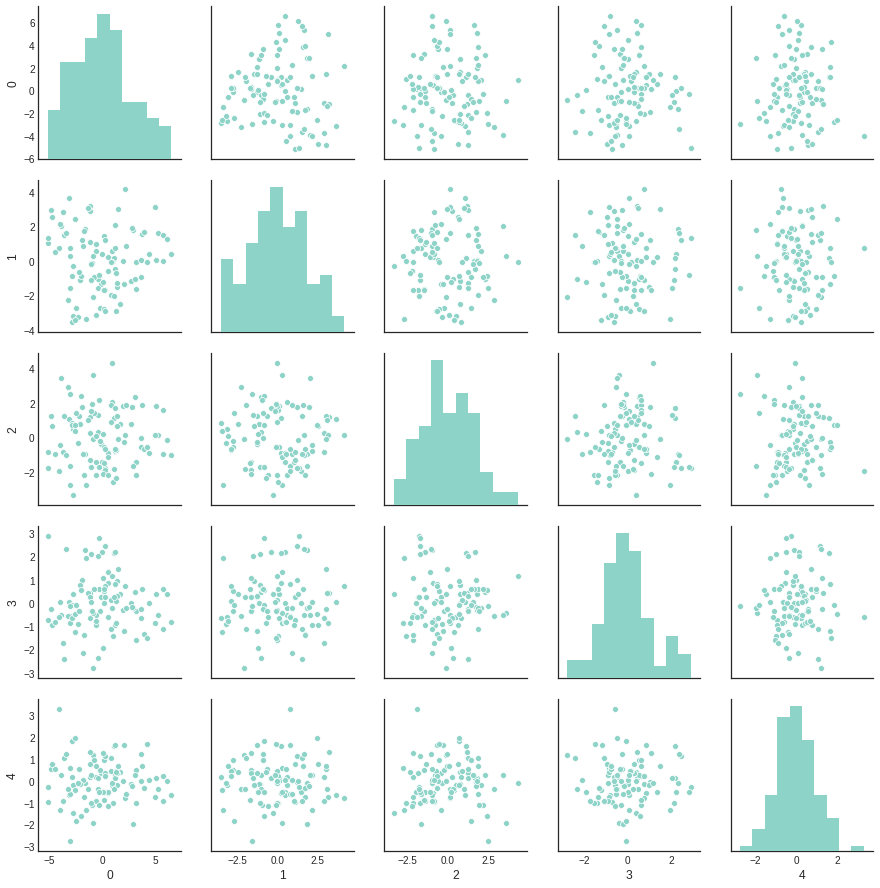

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.6470588235294118
Confusion Matrix:
 [[16  3  7]
 [ 3 30  8]
 [ 5 10 20]]


In [0]:
Accuracy_KMeans_SVC.loc[4,'Cluster_Name']='data_df_clstr1'
Accuracy_KMeans_SVC.loc[4,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[4,'PCA_Applied']='Y'
Accuracy_KMeans_SVC.loc[4,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[4,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No
2  data_df_clstr2  model_SVC              1             1          No
4  data_df_clstr1  model_SVC       0.352113      0.647059           Y
3  data_df_clstr0  model_SVC       0.490196      0.180556           Y
5  data_df_clstr2  model_SVC       0.508772      0.567901           Y

In [0]:
###########################################   DATASET - data_df_clstr2 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr2  ######################################
  dataset=data_df_clstr2.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (131, 19)] , data_valid_df[shape - (57, 19)] , data_test_df[shape - (81, 19)] 


In [0]:
data_valid_df.head()

compactness  circularity  ...  hollows_ratio  class_cd
0        108.0         51.0  ...          205.0         1
1        106.0         48.0  ...          203.0         1
2        108.0         55.0  ...          197.0         1
3        101.0         52.0  ...          202.0         1
4        107.0         52.0  ...          206.0         1

[5 rows x 19 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(131, 18)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00769231e+00  2.47427879e-01  3.83338719e-01 -7.76414357e-02
  -3.35643656e-01  7.82860162e-02  2.89230654e-01 -5.50230900e-01
   5.27174308e-01  3.20049117e-01  8.42885542e-02  1.45768063e-01
  -3.93014343e-02  1.20180614e-01  3.43235036e-01  1.58822945e-01
  -8.99408801e-02 -2.06927571e-02]
 [ 2.47427879e-01  1.00769231e+00  2.70029755e-01  2.23105157e-02
  -1.22574891e-01  8.19944730e-02  3.92687981e-01 -5.95146103e-01
   5.89461456e-01  8.22546859e-01  2.34137943e-01  2.77466104e-01
   5.71254118e-01  2.97212097e-01 -3.62872644e-02  5.82500346e-03
  -5.29013599e-01 -2.78719245e-01]
 [ 3.83338719e-01  2.70029755e-01  1.00769231e+00  7.53318492e-02
  -2.24058252e-01  4.90313014e-01  3.17673310e-01 -4.48793038e-01
   4.88899879e-01  3.37050346e-01  6.06563948e-02  2.28924475e-01
   5.21841352e-02 -1.11883834e-01  2.52648494e-01  3.21906663e-01
  -2.99452103e-01  2.07593557e-01]
 [-7.76414357e-02  2.23105157e-02  7.53318492e-02  1.00769231e+00
   8.22942228e-

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 1.74043518e-01 -2.04706603e-01  3.06880458e-01  6.74582217e-02
  -1.75202223e-01 -3.73717095e-01 -5.05678580e-01 -1.56234068e-01
   2.84347443e-01 -2.79725820e-01  1.69489786e-01  3.46829189e-01
  -5.59212740e-02  1.83297210e-01  4.64907840e-02 -1.69452673e-01
   4.54269009e-02 -2.85674714e-02]
 [ 2.89316425e-01 -1.35759381e-01 -1.14091120e-01 -3.14237254e-01
   2.55944040e-01 -7.95247653e-02  8.99366330e-02 -3.46646882e-01
   9.88475868e-02  2.26245927e-01 -3.14407658e-01  1.50947647e-01
   5.44521338e-01  2.36229909e-01  2.44630788e-02 -8.25263858e-02
  -3.17907535e-02  2.06630525e-01]
 [ 1.47640703e-01 -3.71422004e-01  2.07792489e-01 -9.97818020e-02
  -7.51970415e-02  1.18230540e-01  1.17226623e-01  5.95108904e-01
   1.31652367e-01  6.00195016e-02 -3.55760972e-01 -1.39057860e-01
  -2.00110648e-01  3.53778893e-01  8.28990948e-02 -2.23814265e-01
  -9.52418240e-02  3.88141317e-02]
 [-1.10922880e-01 -1.69725602e-01 -3.07442708e-01 -4.60206539e-01
  -4.21906773e-01 -

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(5.9174702079955175, array([ 0.17404352,  0.28931643,  0.1476407 , -0.11092288, -0.18094349,
       -0.10497069,  0.23876123, -0.38235294,  0.36941318,  0.2738638 ,
        0.17561066,  0.18383706,  0.2181795 ,  0.30164949, -0.0192528 ,
        0.02964669, -0.33702353, -0.27461118])), (3.141138484596442, array([-0.2047066 , -0.13575938, -0.371422  , -0.1697256 , -0.05386365,
       -0.48207618, -0.25856034,  0.02796947, -0.03351352, -0.20949851,
       -0.09151369, -0.23306559,  0.03495718,  0.33068222, -0.17080346,
       -0.2262463 , -0.11406273, -0.39789154])), (2.1625050151970555, array([ 0.30688046, -0.11409112,  0.20779249, -0.30744271, -0.41468059,
        0.00858879, -0.26685293, -0.1240035 ,  0.17898486,  0.0031642 ,
       -0.39730355, -0.31345519, -0.32048978,  0.00119185,  0.26932919,
        0.17685599,  0.00441899,  0.04227289])), (1.5480235868775316, array([ 0.06745822, -0.31423725, -0.0997818 , -0.46020654, -0.35087334,
       -0.09995041,  0.32880307,  0.07954675, -0.

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.2047066 , -0.13575938, -0.371422  , -0.1697256 , -0.05386365,
       -0.48207618, -0.25856034,  0.02796947, -0.03351352, -0.20949851,
       -0.09151369, -0.23306559,  0.03495718,  0.33068222, -0.17080346,
       -0.2262463 , -0.11406273, -0.39789154])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[5.9174702079955175, 3.141138484596442, 2.1625050151970555, 1.5480235868775316, 1.3269288192212374, 1.0567962128150254, 0.7250295127909883, 0.674220955395039, 0.45977258310588714, 0.2743585976708979, 0.2334239726910402, 0.20207482274996078, 0.1294529144727333, 0.11114205610962312, 0.06840137373862762, 0.04904001041562508, 0.038847899229525175, 0.019834513388792125]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.32623882, 0.49941439, 0.61863646, 0.70398128, 0.77713681,
       0.83539953, 0.87537148, 0.91254227, 0.9378902 , 0.953016  ,
       0.965885  , 0.97702568, 0.98416261, 0.99029004, 0.9940611 ,
       0.99676475, 0.99890649, 1.        ])

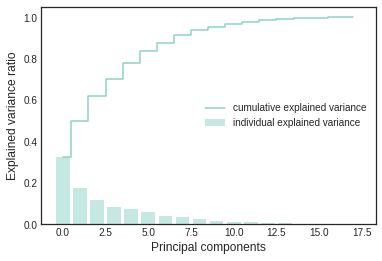

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.17404352,  0.28931643,  0.1476407 , -0.11092288, -0.18094349,
        -0.10497069,  0.23876123, -0.38235294,  0.36941318,  0.2738638 ,
         0.17561066,  0.18383706,  0.2181795 ,  0.30164949, -0.0192528 ,
         0.02964669, -0.33702353, -0.27461118]),
 array([-0.2047066 , -0.13575938, -0.371422  , -0.1697256 , -0.05386365,
        -0.48207618, -0.25856034,  0.02796947, -0.03351352, -0.20949851,
        -0.09151369, -0.23306559,  0.03495718,  0.33068222, -0.17080346,
        -0.2262463 , -0.11406273, -0.39789154]),
 array([ 0.30688046, -0.11409112,  0.20779249, -0.30744271, -0.41468059,
         0.00858879, -0.26685293, -0.1240035 ,  0.17898486,  0.0031642 ,
        -0.39730355, -0.31345519, -0.32048978,  0.00119185,  0.26932919,
         0.17685599,  0.00441899,  0.04227289]),
 array([ 0.06745822, -0.31423725, -0.0997818 , -0.46020654, -0.35087334,
        -0.09995041,  0.32880307,  0.07954675, -0.14688287, -0.25697535,
         0.41851377,  0.32121544, -0.07777306, -0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  1.719624  2.670284 -1.486120  1.620991 -0.617105
1 -1.224528  0.425777 -0.298729  0.902339  0.026355
2  4.696222  0.900724 -2.415862  1.281257 -0.034381
3  0.654515 -1.757576 -1.616274 -1.113814 -1.348526
4 -0.520602 -0.349562 -0.255252 -0.130611 -0.374115

In [0]:
X_train_std_5D.shape

(131, 5)

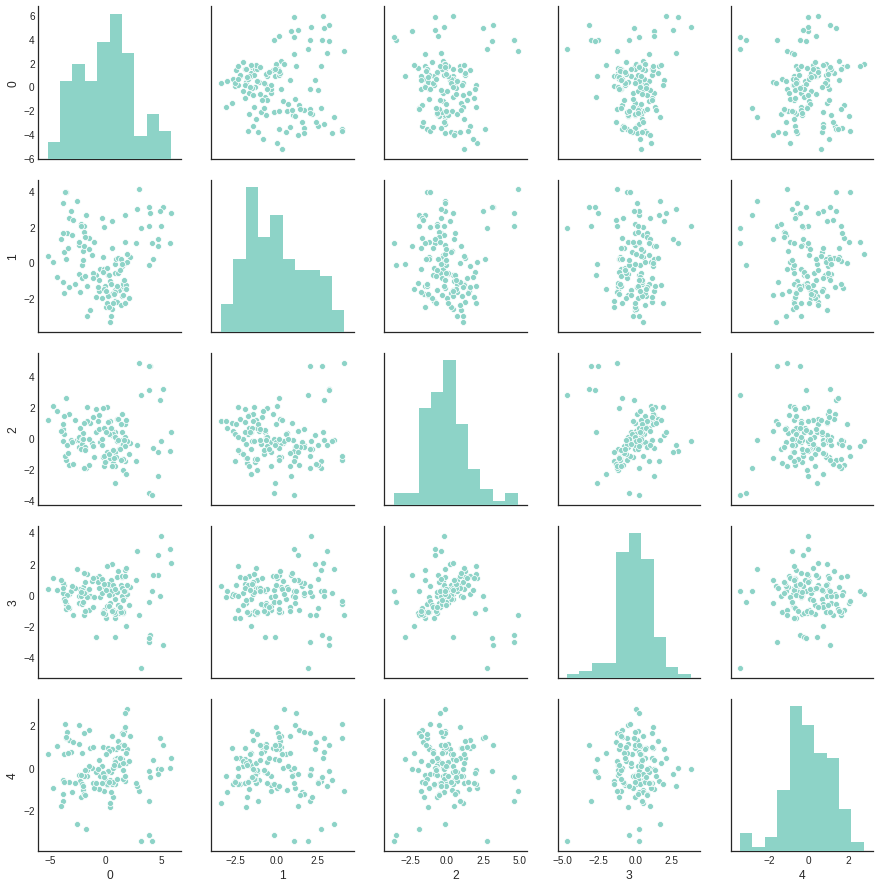

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(57, 18)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01785714  0.03165541 -0.10458694 -0.20461092 -0.3112561  -0.20631801
  -0.06117947 -0.24453235  0.28526501  0.06848438 -0.24687725 -0.26081907
  -0.24498035  0.18324703 -0.06157708 -0.14810339 -0.12695596 -0.18961369]
 [ 0.03165541  1.01785714  0.13645773  0.15755324  0.16054631  0.24879705
   0.52391133 -0.46668428  0.44365858  0.77916474  0.14647279  0.33141192
   0.63560821  0.31165898  0.06326379 -0.19877274 -0.43570029 -0.23806839]
 [-0.10458694  0.13645773  1.01785714  0.25919982  0.07630837  0.50781918
   0.1703311  -0.22480056  0.30407052  0.25444592 -0.01668609  0.07137253
   0.08605572 -0.16856349  0.2496561   0.17699037 -0.172244    0.22857199]
 [-0.20461092  0.15755324  0.25919982  1.01785714  0.91952427  0.43640063
   0.04306045  0.19258723 -0.24321027  0.15406408  0.0465008   0.08619481
  -0.02148624 -0.45809331  0.11476107 -0.1500008   0.34449688  0.50212382]
 [-0.3112561   0.16054631  0.07630837  0.91952427  1.01785714  0.37081971
   0.0646670

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.09639494 -0.18207405 -0.23783792 -0.17741211 -0.26855118  0.5361587
  -0.13980108  0.61702464 -0.02551215 -0.21409153  0.06765694 -0.23139287
   0.02659831 -0.01008584 -0.02393236  0.0402369   0.04365101  0.01236727]
 [ 0.21791218  0.32355037 -0.14063831 -0.22349158 -0.0820053  -0.10582216
   0.29508877  0.21393187  0.17984779  0.02098299  0.33414556  0.4767831
   0.48737332 -0.04394602  0.04760171 -0.0569701  -0.1027433   0.00646516]
 [ 0.01769552  0.21471775 -0.35296904  0.53643771  0.04691059  0.0719148
  -0.14636992 -0.17456136 -0.11020535 -0.54565799 -0.19515813  0.04165145
   0.33614065 -0.0899541  -0.02103803  0.06478687 -0.01889388  0.07857377]
 [-0.17689644  0.29579283 -0.22439702 -0.22518361  0.40271037  0.04405075
  -0.34895142  0.03454729 -0.07738947  0.02506378  0.11960811  0.08302583
  -0.0527234   0.3762224  -0.24882638  0.2843891  -0.01041008 -0.42194312]
 [-0.17719823  0.3115565  -0.04302004 -0.30161475  0.4429006   0.00239052
  -0.22905717  0.04

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(5.7726225081479825, array([ 0.09639494,  0.21791218,  0.01769552, -0.17689644, -0.17719823,
       -0.1711132 ,  0.22093553, -0.38115004,  0.3727016 ,  0.22302971,
        0.01870695,  0.04409412,  0.19165423,  0.3855911 , -0.08714353,
        0.02895589, -0.36990779, -0.36773766])), (3.782181433113628, array([-0.18207405,  0.32355037,  0.21471775,  0.29579283,  0.3115565 ,
        0.33811592,  0.29674555, -0.0438667 ,  0.01252558,  0.27502045,
        0.27633488,  0.3584741 ,  0.28477037, -0.11980215,  0.14450867,
       -0.08002412, -0.0069653 ,  0.15412792])), (2.0016287039774956, array([-0.23783792, -0.14063831, -0.35296904, -0.22439702, -0.04302004,
       -0.23706387,  0.16062125,  0.12889524, -0.21305697, -0.26193997,
        0.52273917,  0.405735  ,  0.1548377 ,  0.08974989, -0.15413017,
        0.13695739,  0.08329258, -0.1220076 ])), (1.4501150846180257, array([-0.17741211, -0.22349158,  0.53643771, -0.22518361, -0.30161475,
        0.21152709,  0.06635032, -0.03219064,  0.

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.18207405,  0.32355037,  0.21471775,  0.29579283,  0.3115565 ,
        0.33811592,  0.29674555, -0.0438667 ,  0.01252558,  0.27502045,
        0.27633488,  0.3584741 ,  0.28477037, -0.11980215,  0.14450867,
       -0.08002412, -0.0069653 ,  0.15412792])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[5.7726225081479825, 3.782181433113628, 2.0016287039774956, 1.4501150846180257, 1.295587941940651, 1.0086397831163363, 0.774963718913306, 0.6678954074713472, 0.5327869565818079, 0.3328580203893772, 0.21972269772892686, 0.19302743022343985, 0.13200310842413446, 0.06115500420935069, 0.03550596123943628, 0.032123406787087576, 0.018804944554308603, 0.009806459991929833]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.31507491, 0.52150977, 0.63076046, 0.70990904, 0.78062339,
       0.83567585, 0.87797407, 0.9144284 , 0.94350839, 0.96167608,
       0.97366874, 0.98420435, 0.9914092 , 0.99474709, 0.99668504,
       0.99843836, 0.99946475, 1.        ])

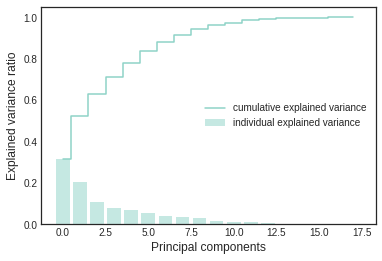

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.09639494,  0.21791218,  0.01769552, -0.17689644, -0.17719823,
        -0.1711132 ,  0.22093553, -0.38115004,  0.3727016 ,  0.22302971,
         0.01870695,  0.04409412,  0.19165423,  0.3855911 , -0.08714353,
         0.02895589, -0.36990779, -0.36773766]),
 array([-0.18207405,  0.32355037,  0.21471775,  0.29579283,  0.3115565 ,
         0.33811592,  0.29674555, -0.0438667 ,  0.01252558,  0.27502045,
         0.27633488,  0.3584741 ,  0.28477037, -0.11980215,  0.14450867,
        -0.08002412, -0.0069653 ,  0.15412792]),
 array([-0.23783792, -0.14063831, -0.35296904, -0.22439702, -0.04302004,
        -0.23706387,  0.16062125,  0.12889524, -0.21305697, -0.26193997,
         0.52273917,  0.405735  ,  0.1548377 ,  0.08974989, -0.15413017,
         0.13695739,  0.08329258, -0.1220076 ]),
 array([-0.17741211, -0.22349158,  0.53643771, -0.22518361, -0.30161475,
         0.21152709,  0.06635032, -0.03219064,  0.13743835, -0.17017747,
         0.07384571,  0.07626211, -0.06083869, -0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -2.765520 -0.827621 -0.720952 -0.270746 -0.355679
1 -1.265509 -0.676480  0.128164  2.035133  0.561890
2 -0.058355  2.499106 -1.226371 -0.958299 -0.745007
3 -2.809425 -1.088960 -0.821497 -0.187160 -0.766418
4 -3.161709  0.558581 -1.343701 -0.967223 -1.800703

In [0]:
X_valid_std_5D.shape

(57, 5)

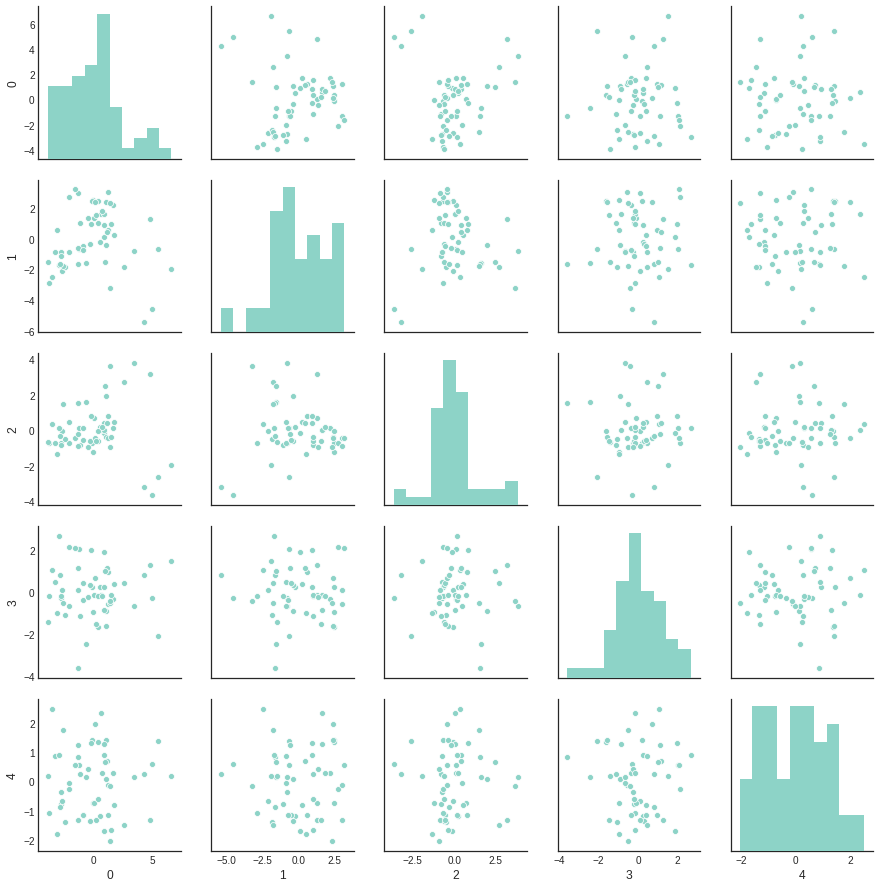

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.5087719298245614
Confusion Matrix:
 [[ 3 19]
 [ 9 26]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
6         0.969466     {'C': 1, 'kernel': 'linear'}
7         0.954198        {'C': 1, 'kernel': 'rbf'}
2         0.946565  {'C': 0.05, 'kernel': 'linear'}
0         0.938931  {'C': 0.01, 'kernel': 'linear'}
4         0.938931   {'C': 0.5, 'kernel': 'linear'}
5         0.938931      {'C': 0.5, 'kernel': 'rbf'}
1         0.786260     {'C': 0.01, 'kernel': 'rbf'}
3         0.786260     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
X_test_clstr_z.shape

(81, 18)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.0125      0.33636198  0.31671928  0.06981224 -0.16855678  0.15498071
   0.41652149 -0.48293708  0.47748461  0.34579691  0.13880982  0.26701262
   0.02418577  0.11961298  0.19127247  0.09289145 -0.14450067 -0.01653096]
 [ 0.33636198  1.0125      0.33868013  0.05682648 -0.04882057  0.32190168
   0.58001894 -0.66370315  0.62794952  0.95541872  0.25862672  0.48234412
   0.66101384  0.31903353  0.12190583 -0.10177372 -0.58417333 -0.2717474 ]
 [ 0.31671928  0.33868013  1.0125      0.19992063 -0.09516854  0.47568566
   0.43935157 -0.46747854  0.49656651  0.35558755  0.31067057  0.35436809
   0.21019962 -0.11558883  0.09886914  0.32973713 -0.36588498  0.17740718]
 [ 0.06981224  0.05682648  0.19992063  1.0125      0.90335191  0.06596533
   0.11251637 -0.04570741  0.06657056 -0.04384097  0.13428062  0.03981546
  -0.00104824 -0.15047525 -0.07107688  0.0822997   0.09961105  0.22541836]
 [-0.16855678 -0.04882057 -0.09516854  0.90335191  1.0125     -0.02088455
  -0.0564094

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.17781871  0.06918648 -0.09228064  0.3089628   0.39976336 -0.18582621
  -0.50431165 -0.22530683  0.46586257  0.30025317  0.21395085  0.0323108
   0.0423739  -0.0418927  -0.03207294  0.0156736   0.03160673  0.0190199 ]
 [-0.31890526  0.02904211 -0.04080476 -0.27861313  0.19952462  0.25841671
  -0.16743963 -0.2092548  -0.17350124 -0.22600805  0.09207338  0.11343169
   0.26020102  0.16513851 -0.15454885 -0.02649684 -0.62023088 -0.18159616]
 [-0.20323806  0.25458131 -0.02178943  0.29676979  0.06865916  0.32398791
   0.32267419  0.34909021  0.38152086 -0.35724022  0.1998338   0.29951038
  -0.04331527 -0.21787649  0.00686186 -0.12034402 -0.01258706 -0.05307897]
 [-0.00555599  0.21970889  0.62936186 -0.00834874  0.25016792  0.03671763
  -0.0172973   0.05923852  0.06075397 -0.0521847  -0.11906777 -0.06587795
   0.02702471  0.3430022   0.51371141  0.17889867  0.0575499  -0.21274917]
 [ 0.05856976  0.1497343   0.64755965 -0.18175579  0.1385355  -0.01626955
   0.06460643 -0.

In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(6.52308733494411, array([-0.17781871, -0.31890526, -0.20323806, -0.00555599,  0.05856976,
       -0.12584459, -0.32938167,  0.35936325, -0.34061432, -0.32344925,
       -0.22065199, -0.27899132, -0.2217293 , -0.21046604, -0.02969443,
       -0.04130404,  0.31406065,  0.16309248])), (3.075042311340422, array([ 0.06918648,  0.02904211,  0.25458131,  0.21970889,  0.1497343 ,
        0.44258199,  0.01081805,  0.10792124, -0.08169049,  0.09507436,
        0.22956535,  0.26240452,  0.0517162 , -0.44191529,  0.09524239,
        0.15691855,  0.19077727,  0.49588295])), (1.9115438100510982, array([-0.09228064, -0.04080476, -0.02178943,  0.62936186,  0.64755965,
       -0.18772749,  0.08351027, -0.05450987,  0.03775152, -0.12890334,
        0.09607989, -0.02584049, -0.01805036,  0.14688042, -0.2388641 ,
        0.0919405 , -0.06510221, -0.09560499])), (1.582026781286684, array([ 0.3089628 , -0.27861313,  0.29676979, -0.00834874, -0.18175579,
       -0.08931941,  0.15756406, -0.17174335,  0.217

In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.06918648,  0.02904211,  0.25458131,  0.21970889,  0.1497343 ,
        0.44258199,  0.01081805,  0.10792124, -0.08169049,  0.09507436,
        0.22956535,  0.26240452,  0.0517162 , -0.44191529,  0.09524239,
        0.15691855,  0.19077727,  0.49588295])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[6.52308733494411, 3.075042311340422, 1.9115438100510982, 1.582026781286684, 1.3792169886328232, 1.00633708446814, 0.7218666280146292, 0.5893564184627936, 0.5172624673351736, 0.3600220323779068, 0.22809397377359783, 0.1248175891097023, 0.07832544413732785, 0.04634593215839258, 0.03078057350465773, 0.022874790235990823, 0.018987498838384253, 0.009012341328161382]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.35791974, 0.52664635, 0.63153215, 0.71833746, 0.79401466,
       0.84923206, 0.88884066, 0.92117846, 0.94956048, 0.96931478,
       0.98183022, 0.98867893, 0.99297662, 0.9955196 , 0.99720853,
       0.99846366, 0.9995055 , 1.        ])

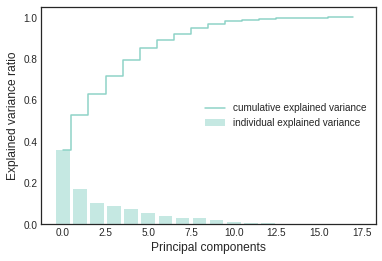

In [0]:
plt.bar(range(len(var_explained)), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.17781871, -0.31890526, -0.20323806, -0.00555599,  0.05856976,
        -0.12584459, -0.32938167,  0.35936325, -0.34061432, -0.32344925,
        -0.22065199, -0.27899132, -0.2217293 , -0.21046604, -0.02969443,
        -0.04130404,  0.31406065,  0.16309248]),
 array([ 0.06918648,  0.02904211,  0.25458131,  0.21970889,  0.1497343 ,
         0.44258199,  0.01081805,  0.10792124, -0.08169049,  0.09507436,
         0.22956535,  0.26240452,  0.0517162 , -0.44191529,  0.09524239,
         0.15691855,  0.19077727,  0.49588295]),
 array([-0.09228064, -0.04080476, -0.02178943,  0.62936186,  0.64755965,
        -0.18772749,  0.08351027, -0.05450987,  0.03775152, -0.12890334,
         0.09607989, -0.02584049, -0.01805036,  0.14688042, -0.2388641 ,
         0.0919405 , -0.06510221, -0.09560499]),
 array([ 0.3089628 , -0.27861313,  0.29676979, -0.00834874, -0.18175579,
        -0.08931941,  0.15756406, -0.17174335,  0.21723172, -0.22671378,
        -0.07380559, -0.08485079, -0.50004883,  0.

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  0.418758 -0.832720 -2.619240  1.002386 -1.369351
1  0.366214  0.028346 -0.075720  0.644782 -0.403249
2 -2.979860 -5.547766 -1.466813  1.092933  1.182753
3 -1.855774  0.438915 -2.092475  0.649083  0.467980
4 -2.070914  0.656043  0.002469 -0.210071  0.672601

In [0]:
X_test_std_5D.shape

(81, 5)

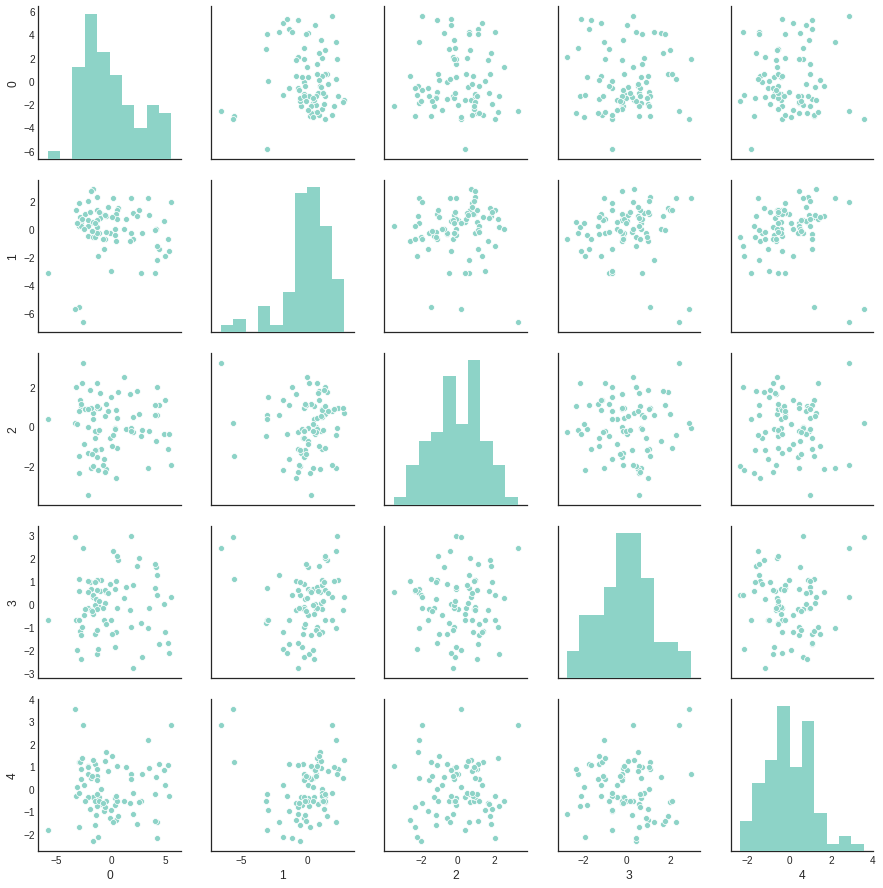

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.5679012345679012
Confusion Matrix:
 [[ 1 26]
 [ 9 45]]


In [0]:
Accuracy_KMeans_SVC.loc[5,'Cluster_Name']='data_df_clstr2'
Accuracy_KMeans_SVC.loc[5,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[5,'PCA_Applied']='Y'
Accuracy_KMeans_SVC.loc[5,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[5,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No
2  data_df_clstr2  model_SVC              1             1          No
4  data_df_clstr1  model_SVC       0.352113      0.647059           Y
3  data_df_clstr0  model_SVC       0.490196      0.180556           Y
5  data_df_clstr2  model_SVC       0.508772      0.567901           Y

In [0]:

Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC       0.882353      0.902778          No
1  data_df_clstr1  model_SVC       0.915493      0.941176          No
2  data_df_clstr2  model_SVC              1             1          No
4  data_df_clstr1  model_SVC       0.352113      0.647059           Y
3  data_df_clstr0  model_SVC       0.490196      0.180556           Y
5  data_df_clstr2  model_SVC       0.508772      0.567901           Y

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

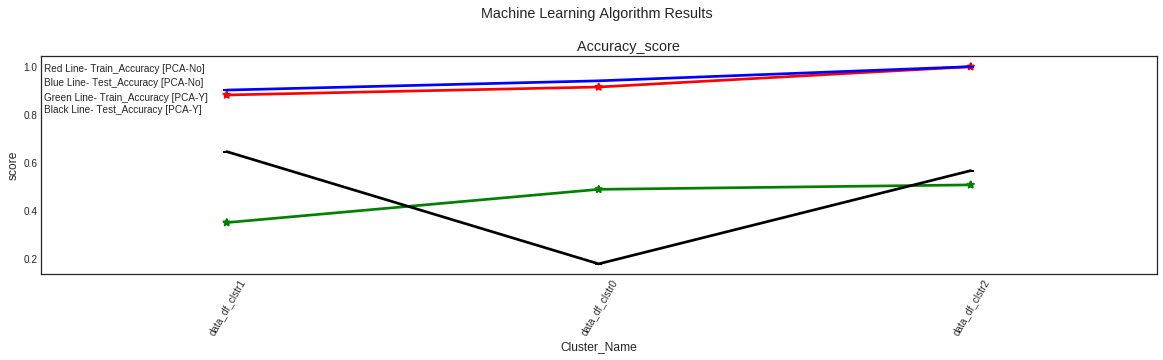

In [0]:
plt.figure(figsize=(20,4))
sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Train_Accuracy'].values, x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'r',markers=["*"],label = 'accuracy_score')
sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Test_Accuracy'].values,  x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'b',markers=["_"],label = 'accuracy_score')

sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Train_Accuracy'].values, x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'g',markers=["*"],label = 'accuracy_score')
sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Test_Accuracy'].values,  x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'black',markers=["_"],label = 'accuracy_score')

plt.text(-0.49,0.98,'Red Line- Train_Accuracy [PCA-No]',rotation=0)
plt.text(-0.49,0.92,'Blue Line- Test_Accuracy [PCA-No]',rotation=0)
plt.text(-0.49,0.86,'Green Line- Train_Accuracy [PCA-Y]',rotation=0)
plt.text(-0.49,0.81,'Black Line- Test_Accuracy [PCA-Y]',rotation=0)

plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('Cluster_Name')
plt.ylabel('score')
plt.xticks(rotation=60)


In [0]:
## We have more accuracy without PCA then with using PCA

In [0]:
######################################### FINISH ########################################################